**Section 0501- Group 08**

Team Member Names:-
1. Murtaza Colombowala
2. Pratyush Gupta
3. Mudra Khandwala
4. Xin Wan
5. Ravi Patel
6. Abhijit Haridas

# **LONG SHOTS**


## **Overview**

### <u>**Prologue and Choice of Grading**</u>

Choice of Grading: **<u>Analysis</u>**

Our project would focus mainly on the data analysis aspect owing to the large variety of soccer data that would be inspected. The data under consideraton spans across the following domains - team performance, player transfers, player market values, and on-field statistics of both teams and players.
Exploring all of this data is crucial to suggesting a clear strategy that average teams can adpot to improve their chances of winning.


### <u>**Table of Contents**</u>

|Section Reference|Section|Sub Section|
|-|-|-|
|*A-1*|Overview|Background|
|*A-2*|Overview|Explaining Transfer Fee and Market Value|
|*A-3*|Overview|Data Sources Used|
|*B-1*|Research Questions|Expenditure Behaviour of Soccer Clubs|
|*B-2*|Research Questions|Comparison of on Field Statistics of clubs of interest|
|*B-3*|Research Questions|Player market value explained by his performance |
|*C-1*|Transfer Spending|Data Extraction of Transfers dataset from Github Repository|
|*C-2*|Transfer Spending|Data Cleaning  |
|*C-3*|Transfer Spending|Data Processing |
|*C-4*|Transfer Spending|Analysis for Spending of Two Groups('Next 5' and 'Top 5') of Teams|
|*C-5*|Transfer Spending|Visualization of Spendings|
|*C-6*|Transfer Spending|Inferences and Conclusions|
|*D-1*|Performance Comparison|Data Extraction|
|*D-2*|Performance Comparison|Processing and Cleaning|
|*D-3*|Performance Comparison|Analysing attack and defense capabilites of the two groups of teams|
|*D-4*|Performance Comparison|Observations and Inferences|
|*E-1*|Modelling Player Market Value|Data Extraction|
|*E-2*|Modelling Player Market Value|Merging Player Market Values with Player Individual Statistics|
|*E-3*|Modelling Player Market Value|Modeling player market values with performance statistics for a player|
|*E-4*|Modelling Player Market Value|Conclusions and Inferences |
|*F*|Putting it all together.|Final Takeaways|






### <u> **A: Indroduction** </u>
<u> **1. Background** </u>

As the most popular league in the world, the English Premier League is of particular interest for 
this analysis. 20 clubs compete every year, but only 5 different clubs have managed to win the 
competition over the last 10 years. We want to take a closer look at how different the player 
transfer policies of the serial winners are from those of the less successful clubs. Apart from the 
transfer market, we look into the gap between these two sets of clubs in terms of physical and 
tactical statistics gathered during game time.

<u> **2. Transfer Fee and Market Value** </u>

When a player is 
transferred from one club to another, the receiving club pays a **‘transfer fee’** to complete the 
transaction. This ‘transfer fee’ is the basis the **market value** which is the perceived value of that player in the market. A lot of 
factors influence these fees; analyzing and predicting the future values of certain players is an 
integral part of the financial planning for soccer clubs. Getting these details right could decide 
how well these clubs do for decades to come.

<u> **3. Data Sources** </u>

The sources that we have used are :

* Fbref.com :https://fbref.com/en/comps/9/stats/Premier-League-Stats
    
    This website hosts a collection of player features in various leagues and competitions in multiple sports. The relevant dataset we consider is a characteristic that describes the performance of a soccer player in the English Premier League

* Fifa Index:(https://www.fifaindex.com/players/)
    
    This website hosts a repository of all  Club Player performance statistics and market values.

* Github repository on transfer fees for each season for each league:https://github.com/ewenme/transfers/tree/master/data
    
    This Github repository hosts all the features and data related to transfers performed within each league during the year. Our analysis  only requires transfers  within the English Premier League
    

### <u> **B: Research Questions** </u>



B.1. <font color='green'> Examining expenditure history of soccer clubs that have traditionally been successful 
and clubs that have had average performances over the last few years. How does a 
club’s ability to spend on player transfers impact their success? Do clubs with different 
success levels generally target different player profiles for acquisitions? </font>

Owing to the nature of how players are acquired in soccer as opposed to other sport leagues, we believe this is an important question to ask. Further, given that the top 5 clubs are relatively static in the English premier league as opposed to other sport leagues where some level of performance volatility can be seen, we aim to investigate if there's a correlation between spending and on-pitch performance.


B.2. <font color='blue'>How do on-field stats differ amongst these two groups of clubs? Do synergies exist 
between strategies of the successful clubs? Are there things a smaller club can emulate 
or do differently to perform better?- </font>

Adding to the above, it must be noted that clubs vary in budgets because of revenue differences which can be significant or marginal on a case-by-case basis. As a result, this can potentially impact a club's spending capability, the talent that they can attract, and their overall result in a season. We believe that this question is worth asking to compare how different clubs can be in terms of on-field performance, determine if commonalities exist between successful teams and suggest strategies for clubs to improve their performance. 


B.3. <font color='red'>How does a club determine a player’s value in terms of money? What are the most 
prominent factors influencing the valuations? Are the player's individual performances helpful in determining the market valuations?- </font>

Given the contrasts in revenues for clubs across a league, the percentage of revenues that a club spends on player transfers can vary significantly.  For example, 1% of a billion dollar club would be equivalent to 10% of a 100 million dollar club and this can potentially mean significant spending for the latter. We aim to determine if a club is valuing players appropriately and getting their money's worth. To this effect, we built a model that determines player valuation based on a player's performance indicators.


 ***Note** : The subsequent section headers have been colour-coded based on the colour of the research question relevant to the question.*

### <u> <font color='green'><u> **C:  Analyzing Transfer Expenditure of Soccer Clubs in English Premier League** </font></u>

#### C.1. Data Extraction of Transfers dataset from Github Repository

We want to be able to combine the 10 csv files from this data source into one dataframe so that we can analyze the data later on.This would make it easier to clean and transform data as well if all data is combined into one dataframe.

In [1]:
# Importing Required Libraries
import lxml as l
import html5lib as hl
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from time import sleep
import re
from random import randint
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

In [2]:
transfer_2010to2020 = pd.DataFrame()
# Create a list of names of csv files
transfer_list = ['2010_english_premier_league.csv','2011_english_premier_league.csv','2012_english_premier_league.csv','2013_english_premier_league.csv',
              '2014_english_premier_league.csv','2015_english_premier_league.csv','2016_english_premier_league.csv','2017_english_premier_league.csv',
              '2018_english_premier_league.csv','2019_english_premier_league.csv','2020_english_premier_league.csv']
#  For loop iterates through all files and combine them into one dataframe
for i in transfer_list:
  j = pd.read_csv('C:/Users/abhij/Downloads/Github-Repo Data Source/'+ i)
  transfer_2010to2020 = transfer_2010to2020.append(j)

In [3]:
transfer_2010to2020 # to view combined dataframe made above

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8.73,Premier League,2010,2010/2011
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.00,Premier League,2010,2010/2011
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.00,Premier League,2010,2010/2011
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.00,Premier League,2010,2010/2011
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.00,Premier League,2010,2010/2011
...,...,...,...,...,...,...,...,...,...,...,...,...
674,Wolverhampton Wanderers,Roderick Miranda,29.0,Centre-Back,Gaziantep FK,free transfer,out,Winter,NaN,Premier League,2020,2020/2021
675,Wolverhampton Wanderers,Rúben Vinagre,21.0,Left-Back,Famalicão,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021
676,Wolverhampton Wanderers,Oskar Buur,22.0,Right-Back,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021
677,Wolverhampton Wanderers,Patrick Cutrone,23.0,Centre-Forward,Valencia,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021


#### C.2. Data Cleaning  

Before we can start analyzing our dataframe, we need to process it in order to clean it up and also make sure we have all the necessary information needed. 

Looking through the dataframe we notice that the main three ways soccer players were acquired are through a money transfer, loan transfer, or from an academy team. We want to be able to differentiate between these types of transfers. In order to do so we can add two new columns to our dataframe. One column will tell us if player was through an academy team while the other column will tell us if the player was through a loan.

Currently the fee_cleaned column in our dataframe is in decimal format with the denominations denoted in millions. We will convert this column into whole numbers instead so that it will be easier to use for our analysis and inferences later on.

An additional item we noticed is that not all the missing values are shown the same way in our dataframe. There are 'NA' for some, 'NaN' for some, and even '?' for some. We want to make sure that all missing and unknown values in our dataset are showing the same way. To do this we will convert all missing values to 'NaN' to be consistent. After looking over all missing values for each column, we decided to keep them in our dataframe even though the value was not known for all columns. While the information for that particular column may not be used, the player can still be used for count calculations. There were also some players who were classified as 'free transfer' that had a fee cleaned value of 'NA'. These were changed to the value 0 instead since it was a free tranfer and no money was involved.

In [4]:
# Reseting the  index
transfer_2010to2020.reset_index(drop=True,inplace=True)
# Adding Boolean columns for players who were either from loan or from a academy team. Needed later on for possible analysis
transfer_2010to2020['Through_Loan'] = transfer_2010to2020['fee'].str.contains('[Ll]oan')
transfer_2010to2020['Through_Academy'] = transfer_2010to2020['club_involved_name'].str.contains('[Uu]\d\d')
transfer_2010to2020

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8.73,Premier League,2010,2010/2011,False,False
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.00,Premier League,2010,2010/2011,False,True
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.00,Premier League,2010,2010/2011,False,True
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.00,Premier League,2010,2010/2011,False,True
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.00,Premier League,2010,2010/2011,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,Wolverhampton Wanderers,Roderick Miranda,29.0,Centre-Back,Gaziantep FK,free transfer,out,Winter,NaN,Premier League,2020,2020/2021,False,False
9981,Wolverhampton Wanderers,Rúben Vinagre,21.0,Left-Back,Famalicão,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False
9982,Wolverhampton Wanderers,Oskar Buur,22.0,Right-Back,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False
9983,Wolverhampton Wanderers,Patrick Cutrone,23.0,Centre-Forward,Valencia,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False


In [5]:
# Identifing the data type of 'fee_cleaned' column
transfer_2010to2020['fee_cleaned'].dtypes

dtype('float64')

In [6]:
# Coverting the values in 'fee_cleaned' into millions
convert_million = 1000000
transfer_2010to2020["fee_cleaned"] = convert_million * transfer_2010to2020["fee_cleaned"]
transfer_2010to2020

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,2010/2011,False,False
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,2010/2011,False,True
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,2010/2011,False,True
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.0,Premier League,2010,2010/2011,False,True
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.0,Premier League,2010,2010/2011,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,Wolverhampton Wanderers,Roderick Miranda,29.0,Centre-Back,Gaziantep FK,free transfer,out,Winter,NaN,Premier League,2020,2020/2021,False,False
9981,Wolverhampton Wanderers,Rúben Vinagre,21.0,Left-Back,Famalicão,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False
9982,Wolverhampton Wanderers,Oskar Buur,22.0,Right-Back,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False
9983,Wolverhampton Wanderers,Patrick Cutrone,23.0,Centre-Forward,Valencia,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False


In [7]:
# Examining how many rows have '?' in the 'fee' column, replace it with 'NaN'
transfer_2010to2020['fee'] = transfer_2010to2020['fee'].replace('?', np.nan)

In [8]:
# Converting 'NaN' to integer 0 in the 'fee_cleaned' column for free transfers. They were free so should be 0 and not NaN
transfer_2010to2020['fee_cleaned'].loc[(transfer_2010to2020['fee'] == 'free transfer')] = 0

C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [9]:
# Identifing the players with an unkonwn age
# we decided not to change because very small amount of player of out the entire dataset. Kept as NaN.
transfer_2010to2020[transfer_2010to2020['age'].isnull()]

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy
840,Bolton Wanderers,Stuart McDonald,NaN,Central Midfield,Gretna,Free transfer,out,Winter,0.0,Premier League,2010,2010/2011,False,False
2357,Sunderland AFC,Callum Hope,NaN,Central Midfield,Sunderland U18,-,in,Summer,0.0,Premier League,2012,2012/2013,False,True
2360,Sunderland AFC,Callum Hope,NaN,Central Midfield,Workington AFC,"End of loanMay 31, 2013",in,Summer,0.0,Premier League,2012,2012/2013,True,False
2897,Sunderland AFC,Callum Hope,NaN,Central Midfield,Workington AFC,Loan,out,Winter,0.0,Premier League,2012,2012/2013,True,False
3374,West Bromwich Albion,Reece Hayes,NaN,Attacking Midfield,West Brom U18,-,in,Summer,0.0,Premier League,2013,2013/2014,False,True
3660,Sunderland AFC,Callum Hope,NaN,Central Midfield,Gateshead FC,Free transfer,out,Summer,0.0,Premier League,2013,2013/2014,False,False
4885,West Bromwich Albion,Reece Hayes,NaN,Attacking Midfield,Without Club,-,out,Summer,0.0,Premier League,2014,2014/2015,False,False


In [10]:
# To read the dataframe after cleaning.
transfer_2010to2020 

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,2010/2011,False,False
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,2010/2011,False,True
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,2010/2011,False,True
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.0,Premier League,2010,2010/2011,False,True
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.0,Premier League,2010,2010/2011,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,Wolverhampton Wanderers,Roderick Miranda,29.0,Centre-Back,Gaziantep FK,free transfer,out,Winter,0.0,Premier League,2020,2020/2021,False,False
9981,Wolverhampton Wanderers,Rúben Vinagre,21.0,Left-Back,Famalicão,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False
9982,Wolverhampton Wanderers,Oskar Buur,22.0,Right-Back,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False
9983,Wolverhampton Wanderers,Patrick Cutrone,23.0,Centre-Forward,Valencia,loan transfer,out,Winter,NaN,Premier League,2020,2020/2021,True,False


#### C.3. Data Processing 

##### C.3.1 Import Ranking by Season

For our analysis we want to compare two groups of teams based on rankings for a particular season. In order to do so we will need another file which contains the ranking positions of each team by season. For each row in our above transfer_2010to2020 dataframe we want to add a new column that shows the ranking of that soccer team for that year. The grouping of teams based on rankings will be the following, for each season

* teams that are ranked 1-5 will be labeled as **'Top Five Teams'** 

* teams that are ranked 6-10 will be labeled as **'Next Five Teams'**. 

Rankings per season go from rank 1-20 but for the remainder of our project we would limit our scope to the first 10 teams. We will import this ranking file and then merge it with our transfer dataframe from above. 

In [11]:
# import file showing team ranking by season
position_table = pd.read_excel(r'C:\Users\abhij\Downloads\seasonTables.xlsx', usecols=range(1,21))

In [12]:
# show table imported
position_table 

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Season,xG delta,xGA delta
0,1,Manchester City,38,27,5,6,83,32,51,86,73.3,31.4,42.0,1.10,526,Ä°lkay GÃ¼ndoÄŸan - 13,Ederson,20-21,9.7,0.6
1,2,Manchester Utd,38,21,11,6,73,44,29,74,60.2,42.2,18.0,0.47,526,Bruno Fernandes - 18,David de Gea,20-21,12.8,1.8
2,3,Liverpool,38,20,9,9,68,42,26,69,72.6,45.3,27.3,0.72,837,Mohamed Salah - 22,Alisson,20-21,-4.6,-3.3
3,4,Chelsea,38,19,10,9,58,36,22,67,64.0,32.8,31.2,0.82,526,Jorginho - 7,Edouard Mendy,20-21,-6.0,3.2
4,5,Leicester City,38,20,6,12,68,50,18,66,56.0,47.7,8.3,0.22,421,Jamie Vardy - 15,Kasper Schmeichel,20-21,12.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,16,Wigan Athletic,38,9,15,14,40,61,-21,42,NaN,NaN,NaN,NaN,16812,"Hugo Rodallega, Charles N'Zogbia - 9",Ali Al-Habsi,10-11,NaN,NaN
216,17,Wolves,38,11,7,20,46,66,-20,40,NaN,NaN,NaN,NaN,27925,Steven Fletcher - 10,Wayne Hennessey,10-11,NaN,NaN
217,18,Birmingham City,38,8,15,15,37,58,-21,39,NaN,NaN,NaN,NaN,25462,Craig Gardner - 8,Ben Foster,10-11,NaN,NaN
218,19,Blackpool,38,10,9,19,55,78,-23,39,NaN,NaN,NaN,NaN,15775,DJ Campbell - 13,Richard Kingson,10-11,NaN,NaN


##### C.3.2 Clean position table and transfer data so that it is ready for merging

Before we can merge our two dataframes together, we have to make sure that the data and formatting of certain columns are similar. We will be merging our data on the season and team name columns from each dataframe so that we can get a rank for each team per season and if they were not ranked in the top 10 it will show up as NaN on this new column we are creating.

First we notice that the season column for our two dataframes are formatted differently. We need to make sure that the season columns are in a similar format as that is one of the columns we will be merging on. In order to do so, we decided to convert our transfer dataframe season column to match the season column from the position table dataframe.

In [13]:
# make copy of original dataframe to alter
transfer_ranked = transfer_2010to2020.copy() 
# following lines of code to format season column so that it matches position_table. column needs to match for merging
transfer_ranked['season'] = transfer_ranked['season'].str.replace('/', '-') 
transfer_ranked['season'] = transfer_ranked['season'].str.replace('\-(\d\d)', '-')
transfer_ranked['season'] = [x[2:] for x in transfer_ranked['season']]

<ipython-input-13-9b47d2640bd1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  transfer_ranked['season'] = transfer_ranked['season'].str.replace('\-(\d\d)', '-')


Second we notice that our position_table we imported has teams ranked from 1-20. Since we are only interested in the top 10 teams, we will filter our position_table to remove ranks 11-20. We also do not need all the information from the position_table so we will filter it in order to only include the ranking of each team per season. 

In [14]:
# create new dataframe of ranking containing only columns we need for top 10 teams
teams = position_table[position_table['Rk'].between(1,10)]
teams = teams[['Rk','Squad','Season']]
# show unique team names of teams that have placed top 10 from 2010 to 2020
teams['Squad'].unique()

array(['Manchester City', 'Manchester Utd', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham', 'Tottenham', 'Arsenal',
       'Leeds United', 'Everton', 'Wolves', 'Sheffield Utd', 'Burnley',
       'Newcastle Utd', 'Southampton', 'Bournemouth', 'West Brom',
       'Stoke City', 'Swansea City', 'Crystal Palace', 'Fulham',
       'Aston Villa', 'Sunderland'], dtype=object)

In order to merge our data, we also have to make sure that the column names we are merging on match as well as the data contained within the columns. Using the unique list of names we determined above, we went through the teams that ranked top 10 per year and made sure that the formatting of the team names was similar for both dataframes. Since there were not too many unique teams that placed top 10 in the past 10 years, we were able to manually go through and change each team name. After this is done we can finally merge our two tables on the season and club_name columns. 

In [15]:
# rename column to match the dataframe we are merging with
teams.rename(columns={'Squad': 'club_name', 'Season':'season'}, inplace=True)
# need to rename team names to match dataframe we are merging with
teams['club_name'] = teams['club_name'].str.replace('Manchester Utd','Manchester United')
teams['club_name'] = teams['club_name'].str.replace('Liverpool','Liverpool FC')
teams['club_name'] = teams['club_name'].str.replace('Chelsea','Chelsea FC')
teams['club_name'] = teams['club_name'].str.replace('Tottenham','Tottenham Hotspur')
teams['club_name'] = teams['club_name'].str.replace('Arsenal','Arsenal FC')
teams['club_name'] = teams['club_name'].str.replace('Everton','Everton FC')
teams['club_name'] = teams['club_name'].str.replace('West Ham','West Ham United')
teams['club_name'] = teams['club_name'].str.replace('Sheffield Utd','Sheffield United')
teams['club_name'] = teams['club_name'].str.replace('Burnley','Burnley FC')
teams['club_name'] = teams['club_name'].str.replace('Newcastle Utd','Newcastle United')
teams['club_name'] = teams['club_name'].str.replace('Southampton','Southampton FC')
teams['club_name'] = teams['club_name'].str.replace('Bournemouth','AFC Bournemouth')
teams['club_name'] = teams['club_name'].str.replace('West Brom','West Bromwich Albion')
teams['club_name'] = teams['club_name'].str.replace('Wolves','Wolverhampton Wanderers')
teams['club_name'] = teams['club_name'].str.replace('Fulham','Fulham FC')
teams['club_name'] = teams['club_name'].str.replace('Sunderland','Sunderland AFC')

In [16]:
# show unique team names after changes made
teams['club_name'].unique()

array(['Manchester City', 'Manchester United', 'Liverpool FC',
       'Chelsea FC', 'Leicester City', 'West Ham United',
       'Tottenham Hotspur', 'Arsenal FC', 'Leeds United', 'Everton FC',
       'Wolverhampton Wanderers', 'Sheffield United', 'Burnley FC',
       'Newcastle United', 'Southampton FC', 'AFC Bournemouth',
       'West Bromwich Albion', 'Stoke City', 'Swansea City',
       'Crystal Palace', 'Fulham FC', 'Aston Villa', 'Sunderland AFC'],
      dtype=object)

In [17]:
# show cleaned table before merging
teams

,Rk,club_name,season
0,1,Manchester City,20-21
1,2,Manchester United,20-21
2,3,Liverpool FC,20-21
3,4,Chelsea FC,20-21
4,5,Leicester City,20-21
...,...,...,...
205,6,Liverpool FC,10-11
206,7,Everton FC,10-11
207,8,Fulham FC,10-11
208,9,Aston Villa,10-11


In [18]:
# show cleaned table before merging
transfer_ranked

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,10-11,False,False
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.0,Premier League,2010,10-11,False,True
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.0,Premier League,2010,10-11,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,Wolverhampton Wanderers,Roderick Miranda,29.0,Centre-Back,Gaziantep FK,free transfer,out,Winter,0.0,Premier League,2020,20-21,False,False
9981,Wolverhampton Wanderers,Rúben Vinagre,21.0,Left-Back,Famalicão,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False
9982,Wolverhampton Wanderers,Oskar Buur,22.0,Right-Back,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False
9983,Wolverhampton Wanderers,Patrick Cutrone,23.0,Centre-Forward,Valencia,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False


##### C.3.3 Merge and Clean transfers dataframe

Now that we have finished cleaning our two dataframes, we can merge them based on the season and club_name columns we discussed before. When merging our dataframe, each season and team name combination from our transfer_ranked table will be compared to the same season and team name combination from our teams table. If there is a match then it will add a column to our transfer_ranked table in order to show the rank for that particular team for that season. If there is no match then the rank column will have NaN. The only teams that should show an NaN are teams that were not placed in the top 10 for that particular season. After merging there are some additional processing steps we need to do before we can use the data for our analysis and visualizations. 

In [19]:
# merge dataframes
transfer_merged = pd.merge(transfer_ranked, teams, on=['season', 'club_name'], how='left')

In [20]:
# show merged dataframe
transfer_merged

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy,Rk
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,10-11,False,False,9.0
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,9.0
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,9.0
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.0,Premier League,2010,10-11,False,True,9.0
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.0,Premier League,2010,10-11,True,False,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,Wolverhampton Wanderers,Roderick Miranda,29.0,Centre-Back,Gaziantep FK,free transfer,out,Winter,0.0,Premier League,2020,20-21,False,False,NaN
9981,Wolverhampton Wanderers,Rúben Vinagre,21.0,Left-Back,Famalicão,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False,NaN
9982,Wolverhampton Wanderers,Oskar Buur,22.0,Right-Back,Grasshoppers,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False,NaN
9983,Wolverhampton Wanderers,Patrick Cutrone,23.0,Centre-Forward,Valencia,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False,NaN


After merging our dataframe we will filter out all the NaN for the 'Rk' column in order to remove the teams that were not in the top 10. As mentioned above we are only interested in analyzing two groups of teams. The two groups being Teams ranked 1-5 and Teams ranked 6-10.

In [21]:
# filter dataframe to only show teams that were ranked in top 10
transfer_merged = transfer_merged.copy()
transfer_merged = transfer_merged[transfer_merged['Rk'].notnull()]
transfer_merged

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy,Rk
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,10-11,False,False,9.0
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,9.0
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,9.0
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.0,Premier League,2010,10-11,False,True,9.0
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.0,Premier League,2010,10-11,True,False,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,West Ham United,Winston Reid,32.0,Centre-Back,Kansas,"End of loanDec 31, 2020",in,Winter,0.0,Premier League,2020,20-21,True,False,6.0
9972,West Ham United,Sébastien Haller,26.0,Centre-Forward,Ajax,£20.25m,out,Winter,20250000.0,Premier League,2020,20-21,False,False,6.0
9973,West Ham United,Robert Snodgrass,33.0,Right Winger,West Brom,£99Th.,out,Winter,99000.0,Premier League,2020,20-21,False,False,6.0
9974,West Ham United,Winston Reid,32.0,Centre-Back,Brentford,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False,6.0


Since we are not interested in individual ranks, we will rename the ranks of teams with rank of 1-5 to 'Top Five Teams' and teams with rank of 6-10 to 'Next Five Teams'. After this is done it will be easy to group our data by this column so that we can do our analysis regarding these two groups of teams. We will also rename the 'Rk' column to 'Group' so that it is more accurate. 

In [22]:
# group teams based on ranking so that we can compare two groups for analysis. rank 1-5 as Top Five Teams and rank 6-10 as Next Five Teams
transfer_merged['Rk'] = transfer_merged['Rk'].astype(int)
transfer_merged['Rk']= np.where(transfer_merged['Rk'].isin([1,2,3,4,5]), 'Top Five Teams', np.where(transfer_merged['Rk'].isin([6,7,8,9,10]), 'Next Five Teams', 'Ignore'))
transfer_merged.rename(columns={'Rk': 'Group'}, inplace=True) # rename column

In [23]:
# show final merged dataframe after cleaning
transfer_merged

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy,Group
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,10-11,False,False,Next Five Teams
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,Next Five Teams
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,Next Five Teams
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.0,Premier League,2010,10-11,False,True,Next Five Teams
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.0,Premier League,2010,10-11,True,False,Next Five Teams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,West Ham United,Winston Reid,32.0,Centre-Back,Kansas,"End of loanDec 31, 2020",in,Winter,0.0,Premier League,2020,20-21,True,False,Next Five Teams
9972,West Ham United,Sébastien Haller,26.0,Centre-Forward,Ajax,£20.25m,out,Winter,20250000.0,Premier League,2020,20-21,False,False,Next Five Teams
9973,West Ham United,Robert Snodgrass,33.0,Right Winger,West Brom,£99Th.,out,Winter,99000.0,Premier League,2020,20-21,False,False,Next Five Teams
9974,West Ham United,Winston Reid,32.0,Centre-Back,Brentford,loan transfer,out,Winter,NaN,Premier League,2020,20-21,True,False,Next Five Teams


#### C.4. Analysis for Spending of Two Groups('Next 5' and 'Top 5') of Teams

For one of our analysis we want to see the different spending amounts for the two groups of teams. We are interested in seeing how much each group spends to acquire players. In order to do this we will filter our dataframe to only include transfers 'in' a team since 'out' represents players that a team sells. After this is done we can groupby the year and Group columns and then sum the fee_cleaned column for each group. Doing this will tell us the total amount each group spent to acquire players per year. After this we will plot the data in a bar chart in order to be able to easily see any patterns.

In [24]:
# create dataframe of only 'in' transfers
in_df = transfer_merged[transfer_merged['transfer_movement'].str.contains('in')]
in_df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy,Group
0,Aston Villa,Stephen Ireland,23.0,Attacking Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,10-11,False,False,Next Five Teams
1,Aston Villa,Durrell Berry,18.0,Right-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,Next Five Teams
2,Aston Villa,Arsenio Halfhuid,18.0,Centre-Back,Aston Villa U18,-,in,Summer,0.0,Premier League,2010,10-11,False,True,Next Five Teams
3,Aston Villa,Ciaran Clark,20.0,Centre-Back,Aston Villa U23,-,in,Summer,0.0,Premier League,2010,10-11,False,True,Next Five Teams
4,Aston Villa,Nathan Delfouneso,20.0,Centre-Forward,Burnley,"End of loanMay 1, 2011",in,Summer,0.0,Premier League,2010,10-11,True,False,Next Five Teams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,Manchester United,Tahith Chong,21.0,Right Winger,Werder Bremen,"End of loanJan 30, 2021",in,Winter,0.0,Premier League,2020,20-21,True,False,Top Five Teams
9968,West Ham United,Saïd Benrahma,25.0,Left Winger,Brentford,£20.79m,in,Winter,20790000.0,Premier League,2020,20-21,False,False,Next Five Teams
9969,West Ham United,Jesse Lingard,28.0,Right Winger,Man Utd,Loan fee:£1.53m,in,Winter,1530000.0,Premier League,2020,20-21,True,False,Next Five Teams
9970,West Ham United,Frederik Alves,21.0,Centre-Back,Silkeborg IF,£1.44m,in,Winter,1440000.0,Premier League,2020,20-21,False,False,Next Five Teams


In [25]:
# groupby year and Group so can acquire total amount spent by each group per year
fee_in = in_df.groupby(['Group','year'])
# make dataframe of total fee cleaned by group per year
fee_in = pd.DataFrame(fee_in['fee_cleaned'].sum().reset_index()).sort_values(by=['Group', 'year'], ascending=False)
# convert amount of fee_cleaned to millions for simpler visualization 
fee_in['fee_cleaned'] = fee_in['fee_cleaned']/1000000
# show fee cleaned grouping dataframe
fee_in

,Group,year,fee_cleaned
21,Top Five Teams,2020,581.283
20,Top Five Teams,2019,486.470
19,Top Five Teams,2018,494.771
18,Top Five Teams,2017,964.605
17,Top Five Teams,2016,561.816
16,Top Five Teams,2015,460.436
15,Top Five Teams,2014,543.000
14,Top Five Teams,2013,346.955
13,Top Five Teams,2012,339.630
12,Top Five Teams,2011,228.640


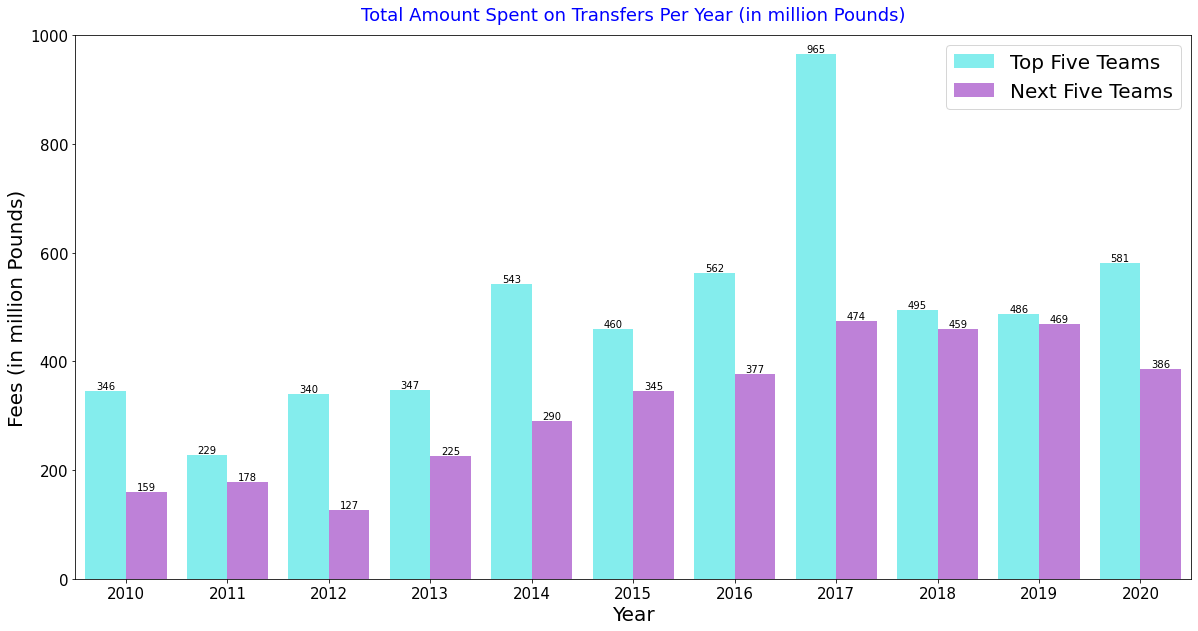

In [26]:
# plotting grouped bar chart and formatting
axis = sns.barplot(x=fee_in['year'], y=fee_in['fee_cleaned'], hue=fee_in['Group'], palette=['Cyan', 'darkviolet'], alpha=.55) # hue helps to plot the groups side by side
axis.set_title('Total Amount Spent on Transfers Per Year (in million Pounds)', fontdict={'fontsize': 18, 'fontweight': 500, 'color': 'blue'}, pad=15) 
axis.set_ylim([0,1000])
plt.ylabel('Fees (in million Pounds)',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
axis.figure.set_size_inches(20,10)
for x in axis.patches:
    height = x.get_height()
    axis.annotate(f'{height:.0f}',xy=(x.get_x() + x.get_width() / 2, height), ha='center', va='bottom')

Based on the grouped bar chart above, we observe the following: 

* The 'Top Five Teams' spend more money to acquire players per year when compared to the 'Next Five Teams'. This confirms our thinking that the 'Top Five Teams' have more money to spend per year when compared to the 'Next Five Teams'.

*  The spending differences were substantiallly higher in  2017 and 2020. To explain the difference observed in 2020, we can infer that the Top Five Teams were still able to maintain their transfer budgets despite the loss of ticketing revenue due to COVID as they had other sources of revenue(merchandise sales, advertising, brand partnerships etc.). On the other hand, the next five teams could not spend as much because their primary source of revenue(ticketing) was affected.   

* In 2017, the Premier League signed a new broadcasting deal for its TV rights which led to increased revenues for each team since that year. The share of revenue that  a team earns is directly proportional to the position that the team finishes the year before. This meant that the top 5 teams had substantially more financial resources to invest in the transfer market.
    (Source: https://www.bbc.com/news/business-31379128)

Next we want to see how exactly each group spends there money based on the position of the player they are acquiring. 

## Transfer Spending By Position
- Read `transfer_merge` data we processed
    - We added a column to divided teams into two groups: `Top Five` and `Next Five` in order to analyze their transfer spending based on positions
- Filtered out players transferred in through `Academy` and `Loan` because those type of transfers will not result in any spendings
    - We also filtered out `Goalkeepers` because they are a very small percentage in the transfer data
- Filtered out only `Attack` and group by  their `Group`
    - Use `sum()` to calculate the amount of money each group spend on `Attack` each year

### Splitting positions in four main areas
- Attack
- Defense
- Midfield
- Goalkeeper

We generate four lists to store what position goes into each of these four areas.
Then loop through the `position` column replace the position name to corresponding areas

In [27]:
# show unique positions
transfer_merged['position'].unique()

array(['Attacking Midfield', 'Right-Back', 'Centre-Back',
       'Centre-Forward', 'Central Midfield', 'Goalkeeper',
       'Defensive Midfield', 'Left-Back', 'Left Winger', 'Right Winger',
       'Right Midfield', 'Second Striker', 'Left Midfield', 'Midfielder'],
      dtype=object)

In [28]:
# make 4 lists for corresponding areas based on unique positions
attack = ['Centre-Forward','Right Winger','Left Winger','Second Striker']
midfield =['Central Midfield','Attacking Midfield','Defensive Midfield','Right Midfield','Left Midfield','Midfielder']
defense = ['Centre-Back','Right-Back','Left-Back']
goalkeeper = ['Goalkeeper'] 
# loop through position column to replace position name with corresponding areas
for a in attack:
    transfer_merged['position'] = transfer_merged['position'].str.replace(a,'Attack')
for b in midfield:
    transfer_merged['position'] = transfer_merged['position'].str.replace(b,'Midfield')
for c in defense:
    transfer_merged['position'] = transfer_merged['position'].str.replace(c,'Defense')
for d in goalkeeper:
    transfer_merged['position'] = transfer_merged['position'].str.replace(d,'Goalkeeper')

For analysis of transfer fees we chose to discard loan and academy transfers since there are generally no transfer fees associated with the transfers.

We also exclude transfers of goal keepers since these transfers are relatively rare. 

In [29]:
# filterd out 'Through_Loan', 'Through_Academy', and 'Goalkeeper' to store in a new DataFrame
x = transfer_merged.loc[(transfer_merged['Through_Loan']==False) & (transfer_merged['Through_Academy']==False) & (transfer_merged['transfer_movement']=='in') & (transfer_merged['position']!='Goalkeeper')]
x

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,Through_Loan,Through_Academy,Group
0,Aston Villa,Stephen Ireland,23.0,Midfield,Man City,£8.73m,in,Summer,8730000.0,Premier League,2010,10-11,False,False,Next Five Teams
81,Manchester United,Bebé,20.0,Attack,Vit. Guimarães,£7.92m,in,Summer,7920000.0,Premier League,2010,10-11,False,False,Top Five Teams
82,Manchester United,Chris Smalling,20.0,Defense,Fulham,£7.20m,in,Summer,7200000.0,Premier League,2010,10-11,False,False,Top Five Teams
83,Manchester United,Chicharito,22.0,Attack,Chivas,£6.75m,in,Summer,6750000.0,Premier League,2010,10-11,False,False,Top Five Teams
144,Fulham FC,Mousa Dembélé,23.0,Midfield,AZ Alkmaar,£5.40m,in,Summer,5400000.0,Premier League,2010,10-11,False,False,Next Five Teams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,Liverpool FC,Ben Davies,25.0,Defense,Preston,£513Th.,in,Winter,513000.0,Premier League,2020,20-21,False,False,Top Five Teams
9927,Manchester City,Filip Stevanovic,18.0,Attack,Partizan,£7.65m,in,Winter,7650000.0,Premier League,2020,20-21,False,False,Top Five Teams
9936,Manchester United,Amad Diallo,18.0,Attack,Atalanta BC,£18.90m,in,Winter,18900000.0,Premier League,2020,20-21,False,False,Top Five Teams
9968,West Ham United,Saïd Benrahma,25.0,Attack,Brentford,£20.79m,in,Winter,20790000.0,Premier League,2020,20-21,False,False,Next Five Teams


In [30]:
# Filtered out only Attack position
# Group by DataFrame by their 'Group'
x[x['position']=='Attack'].groupby(by=['Group','position','year']).sum('fee_cleaned')

age  fee_cleaned  Through_Loan  \
Group           position year                                     
Next Five Teams Attack   2010  189.0   96030000.0             0   
                         2011  263.0   34650000.0             0   
                         2012  325.0   58795000.0             0   
                         2013  176.0   77450000.0             0   
                         2014  504.0  127266000.0             0   
                         2015  350.0  181530000.0             0   
                         2016  287.0  121410000.0             0   
                         2017  380.0  230000000.0             0   
                         2018  267.0  149850000.0             0   
                         2019  312.0  242330000.0             0   
                         2020  182.0   81340000.0             0   
Top Five Teams  Attack   2010  255.0  140310000.0             0   
                         2011  197.0   64350000.0             0   
                         2012  266.0  126590000.0             0   
                         2013  290.0  135230000.0             0   
                         2014  188.0  198900000.0             0   
                         2015  212.0  206798000.0             0   
                         2016  224.0  220230000.0             0   
                         2017  257.0  310500000.0             0   
                         2018   92.0  132651000.0             0   
                         2019   70.0   53010000.0             0   
                         2020  203.0  184680000.0             0   

                               Through_Academy  
Group           position year                   
Next Five Teams Attack   2010                0  
                         2011                0  
                         2012                0  
                         2013                0  
                         2014                0  
                         2015                0  
                         2016                0  
                         2017                0  
                         2018                0  
                         2019                0  
                         2020                0  
Top Five Teams  Attack   2010                0  
                         2011                0  
                         2012                0  
                         2013                0  
                         2014                0  
                         2015                0  
                         2016                0  
                         2017                0  
                         2018                0  
                         2019                0  
                         2020                0

#### C.5. Visualization of Spendings

In [31]:
a=x.groupby(by=['Group','position']).sum('fee_cleaned')
a

age   fee_cleaned    year  Through_Loan  \
Group           position                                               
Next Five Teams Attack    3235.0  1.400651e+09  270016             0   
                Defense   2584.0  7.367890e+08  213627             0   
                Midfield  2598.0  1.146484e+09  209494             0   
Top Five Teams  Attack    2254.0  1.773249e+09  191373             0   
                Defense   2566.0  1.637754e+09  219625             0   
                Midfield  2133.0  1.573138e+09  183294             0   

                          Through_Academy  
Group           position                   
Next Five Teams Attack                  0  
                Defense                 0  
                Midfield                0  
Top Five Teams  Attack                  0  
                Defense                 0  
                Midfield                0

In [32]:
a.xs('Next Five Teams', level='Group')['fee_cleaned'].index

Index(['Attack', 'Defense', 'Midfield'], dtype='object', name='position')

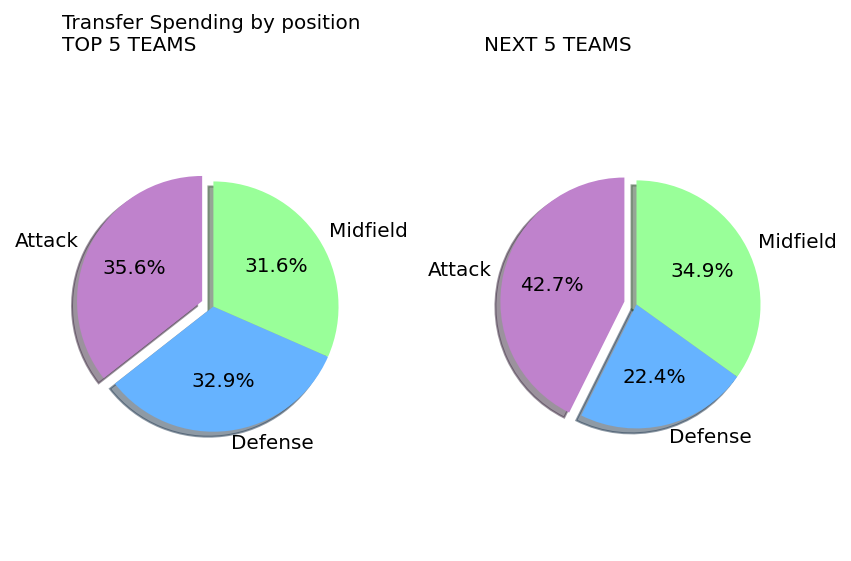

In [33]:
# Pie chart
position = a.xs('Top Five Teams', level='Group')['fee_cleaned'].index
# only "explode" the first slice (spent most moeny)
explode = (0.1, 0, 0)
#add colors
colors = ['#bf82cc','#66b3ff','#99ff99','#ffcc99']
#fig1, ax1 = plt.subplots()
fig = plt.figure(figsize=(6,4),dpi=144)
ax1 = fig.add_subplot(121)
ax1.pie(a.xs('Top Five Teams', level='Group')['fee_cleaned'], explode=explode, labels= position, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')
ax1.set_title('Transfer Spending by position \nTOP 5 TEAMS',fontsize = 10,loc="left")

#plt.tight_layout()
ax2 = fig.add_subplot(122)
ax2.pie(a.xs('Next Five Teams', level='Group')['fee_cleaned'], explode=explode,labels= position, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
        
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')
plt.title('\nNEXT 5 TEAMS',fontsize = 10,loc="left")


plt.tight_layout()
plt.show()

#### C.6. Inferences and Conclusions

***Top five teams are spending money evenly on `Attack` and `Defense` while Next five teams are spending a lot of more (7.1%) money on `Attack` and 10.5% less on `Defense`***

Good teams are focusing on defense because there is a term called 'Counter-Attack' which means a quick attacking play by a team in response to another team's attack.The attacking team becomes defensive and their players has not had time to return to thier own half court to set up a complete defense play. This will result in more offensive players than defensive players. Good soccer teams are good at taking this advantage to perform a effective attack 

From the Data above, top five teams are willing to spend more money to buy players who are good at defense so they can potentially have more chances of Counter-Attack in order to score more points in the game

### <u> <font color='blue'><u> **D:  Analyzing Performance Statistics of Top five and the next five groups of teams in English Premier League** </font></u>

#### D.1. Data Extraction

In [34]:
# Importing Required Libraries
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from time import sleep
import re

### <u>**Scraping, merging and indexing soccer stats data (fbref)**</u>


 The Premier League is designed such that each team plays against the 19 other teams home and away. The points distributed are as follows:
#### **3 - Win**
#### **1 - Draw/Tie**
#### **0 - Loss**
At the end of season in May, the team with the most points is declared the champions for that season. The standings at the end of each season are called the "table" for that season.
For us to analyze performance, we need to import and aggregate the season tables from the last 10 years.


In [35]:
final =pd.DataFrame() #df that would have the aggregated data for all seasons
excel_list=['20-21.xlsx','19-20.xlsx','18-19.xlsx','17-18.xlsx','16-17.xlsx','15-16.xlsx','14-15.xlsx','13-14.xlsx','12-13.xlsx','11-12.xlsx','10-11.xlsx']
# Iterating through list of excel files,and  importing it as dataframe and finally appending it.
for file in excel_list:
    x = pd.read_excel('seasonTable/'+file)
    x['Season'] = file.split('.')[0] #adding a column for the year if the season. For eg., splitting on '.' to get '20-21'
    final = final.append(x)

In [36]:
#dropping column 'Notes' as it holds information irrelevant to our analysis
final.drop(columns=['Notes'],inplace=True)

 'xG' is a parameter tells us the **quality of an attempted shot on goal and its probability of finding the net, rather than the actual outcome of the shot.** Over a season, a team's xG value can help us quantify the attacking threat that they posed to the opposition. 'GF' stands for actual goals that a team scored over the season. **The difference between xG and GF can indicate a team's shooting ability.
 Similarly the difference between xGA (expected goals against) and GA (goals against) can indicate a team's defending ability.**

In [37]:
#calculating the gap between a team's expected metrics vs real life metrics
final['xG delta'] = final['GF']-final['xG']
final['xGA delta'] = final['GA']-final['xGA']
final.head()

# final.to_excel('seasonTables.xlsx',index=False)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Season,xG delta,xGA delta
0,1,Manchester City,38,27,5,6,83,32,51,86,73.3,31.4,42.0,1.10,526,Ä°lkay GÃ¼ndoÄŸan - 13,Ederson,20-21,9.7,0.6
1,2,Manchester Utd,38,21,11,6,73,44,29,74,60.2,42.2,18.0,0.47,526,Bruno Fernandes - 18,David de Gea,20-21,12.8,1.8
2,3,Liverpool,38,20,9,9,68,42,26,69,72.6,45.3,27.3,0.72,837,Mohamed Salah - 22,Alisson,20-21,-4.6,-3.3
3,4,Chelsea,38,19,10,9,58,36,22,67,64.0,32.8,31.2,0.82,526,Jorginho - 7,Edouard Mendy,20-21,-6.0,3.2
4,5,Leicester City,38,20,6,12,68,50,18,66,56.0,47.7,8.3,0.22,421,Jamie Vardy - 15,Kasper Schmeichel,20-21,12.0,2.3


 Now that we know how teams performed generally over the last 10 years, we need to import statistics for individual skills such as passing the ball, shooting on goal, etc. This data will be beneficial to analyze the gap between 2 teams based on their style of play and on field performances.<br>


In [38]:
tables = pd.read_excel('seasonTables.xlsx') #importing aggregated standings of each team at the end of last 10 seasons

#### D.2. Processing and Cleaning  

In [39]:
#adding labels for Top 5 and Next 5 teams. Rest of the teams are tagged "Ignore" and are dropped subsequently
tables['Tag']= np.where(tables['Rk'].isin([1,2,3,4,5]), 'Top Five Teams', np.where(tables['Rk'].isin([6,7,8,9,10]), 'Next Five Teams', 'Ignore'))

In [40]:
#dropping all teams that are not in positions 1-10 (top5 or next5)

tables=tables[tables['Tag']!='Ignore']

#### D.3. Analysing attack and defense capabilites of the two groups of teams
The best measure for attacking capablilty of a team is the number of goals scored over a season. Similarly, the defensive capability can be evaluated by taking into account the number of goals conceded. Using the final standings of the premier league over the last 10 years, let us take a closer look at the number of goals scored and conceded by each group on average.

In [41]:
tables = pd.read_excel('seasonTables.xlsx') #importing aggregated team standings at the end of last 10 seasons

In [42]:
#adding labels for Top 5 and Next 5 teams. Rest of the teams are tagged "Ignore" and are dropped subsequently

tables['Tag']= np.where(tables['Rk'].isin([1,2,3,4,5]), 'Top Five Teams', np.where(tables['Rk'].isin([6,7,8,9,10]), 'Next Five Teams', 'Ignore'))

In [43]:
#dropping all teams that are not in positions 1-10 (top5 or next5)

tables=tables[tables['Tag']!='Ignore']

In [44]:
#calculating mean performance of both groups over 10 years
tables[['Season','Tag','GF','GA','GD']].groupby('Tag').mean(['GF','GA','GD'])

,GF,GA,GD
Tag,,,
Next Five Teams,52.545455,48.127273,4.418182
Top Five Teams,74.090909,38.090909,36.000000


### D.4. Observations and Inferences

**The field 'GD' (goal difference) is the difference between the goals scored (GF) and goals against (GA).**<br>

Despite of spending 20.3% percent more on their attack than their defense, the Next Five team could manage a goal difference of just 4.4.
On the other hand, the Top Five teams have a far smaller gap between their spending on attack and defense. This does not translate to their on field performances as they have a goal difference of 36.0 which is **9 times** more than the Next 5 group.<br><br>
This speaks about the **difference in the quality of coaching and recruitement of the players** by the Top 5 teams.
Top Five teams invest a lot of resources in scouting. This ensures that their new signings are likelier to succeed based on the research the teams have done already. 


In [45]:
#including 'Season' in groupby clause to take a closer look at performance each year
goal_mean=tables[['Season','Tag','GF','GA','GD']].groupby(['Season','Tag']).mean(['GF','GA','GD']).sort_values(by='Season')
goal_mean.reset_index(inplace=True)

In [46]:
#spitting the dataframe for both groups
next5=goal_mean[goal_mean['Tag']=='Next Five Teams'] 
top5=goal_mean[goal_mean['Tag']=='Top Five Teams']

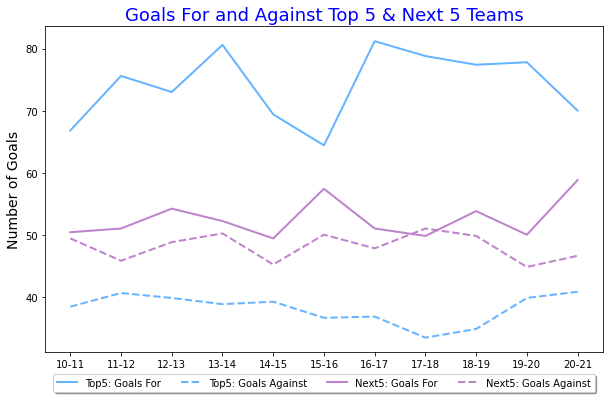

In [47]:
#line plot to track attack/defense performance over the last 10 years
plt.figure(figsize=(10,6))

#plot individual lines for 'goals for' and 'goals against' of both groups
a1=plt.plot(top5['Season'],top5['GF'], color='#66b3ff', linewidth=2, label='Top5: Goals For')
a2=plt.plot(top5['Season'],top5['GA'], '--', color='#66b3ff', linewidth=2, label='Top5: Goals Against')
a3=plt.plot(next5['Season'],next5['GF'], color='#bf82cc', linewidth=2, label='Next5: Goals For')
a4=plt.plot(next5['Season'],next5['GA'], '--', color='#bf82cc', linewidth=2, label='Next5: Goals Against')
# -- lines are for goals conceded and - lines are for goals scored

#adding axes labels and a title
plt.xlabel("Season",fontsize=14, color='black')
plt.ylabel("Number of Goals",fontsize=14, color='black')
plt.title("Goals For and Against Top 5 & Next 5 Teams",fontsize=18, color='blue')

#setting position and parameters of legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

Over the last 10 years, we observe that the gap in performances of both the groups has been consistent.<br>

The additional spending on attack by the Next Five Teams does not translate to onfield performances as seen earlier. Infact for the 2017-2018 season we see that the group conceded more goals than they conceded. Incidents like these can be avoided by following balanced spending patterns and focusing spending on defensive players as well.
Focusing on defense and building from there could be a great plan for the Next Five Teams to plan around.<br>

Moving to the Top Five Teams, their trends of improved attack and defenses as a consequence of spending well on defensive players supports the age old saying - 

***'Attack is the best form of defense.'***

### Analyzing the performance parameters for both the groups of teams across the last 10 seasons 

In this part, we analyze shooting statistics, build visualizations to differentiate between the groups of clubs.

#### Importing Shooting Statistics

In [48]:
file = r'C:\Users\abhij\Downloads'
final_shooting = pd.DataFrame()
excel_list_shooting=['20-21_shootingstats.xlsx', '19-20_shootingstats.xlsx', '18-19_shootingstats.xlsx', '17-18_shootingstats.xlsx','16-17_shootingstats.xlsx','15-16_shootingstats.xlsx','14-15_shootingstats.xlsx','13-14_shootingstats.xlsx', '12-13_shootingstats.xlsx', '11-12_shootingstats.xlsx','10-11_shootingstats.xlsx']
for file in excel_list_shooting:
    x = pd.read_excel('Shooting stats/'+file, header=[0,1])
    x['Season'] = file.split('_')[0]
    final_shooting = final_shooting.append(x)

## Loading consolidated season table dataframe 

seasontable_df = pd.read_excel(r'seasonTables.xlsx',usecols=range(1,21))

seasontable_df


## Slicing seasontable_df to contain only relevant data and storing it in a new dataframe

team_season_df = seasontable_df[seasontable_df['Rk'].between(1,10)]
team_season_df = team_season_df[['Rk','Squad','Season']]

team_season_df

,Rk,Squad,Season
0,1,Manchester City,20-21
1,2,Manchester Utd,20-21
2,3,Liverpool,20-21
3,4,Chelsea,20-21
4,5,Leicester City,20-21
...,...,...,...
205,6,Liverpool,10-11
206,7,Everton,10-11
207,8,Fulham,10-11
208,9,Aston Villa,10-11


#### Processing, Cleaning and Merging

In [49]:
## Removing duplicated columns in the merged dataframe

final_shooting = final_shooting.loc[:,~final_shooting.columns.duplicated()]

final_shooting

Expected                             Season Standard                    \
       G-xG np:G-xG  npxG npxG/Sh    xG            Dist    FK  G/Sh G/SoT   
0      -0.5    -2.0  49.0    0.11  53.5  20-21     16.9  23.0  0.10  0.33   
1      -0.9    -1.5  48.5    0.10  52.9  20-21     16.5  15.0  0.09  0.26   
2     -12.6   -11.8  44.8    0.10  51.6  20-21     16.6  14.0  0.07  0.26   
3      -7.9    -8.6  37.6    0.10  39.9  20-21     16.6  15.0  0.08  0.23   
4      -8.0    -8.4  56.4    0.10  64.0  20-21     16.3  16.0  0.09  0.25   
..      ...     ...   ...     ...   ...    ...      ...   ...   ...   ...   
15      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.24   
16      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.26   
17      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.20   
18      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.20   
19      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.29   

    ...                                          Unnamed: 0_level_0  \
    ... PK PKatt     Sh  Sh/90  SoT  SoT% SoT/90              Squad   
0   ...  6     6  455.0  11.97  141  31.0   3.71            Arsenal   
1   ...  5     6  518.0  13.63  179  34.6   4.71        Aston Villa   
2   ...  6     9  476.0  12.53  129  27.1   3.39           Brighton   
3   ...  3     3  383.0  10.08  125  32.6   3.29            Burnley   
4   ...  8    10  553.0  14.55  194  35.1   5.11            Chelsea   
..  ... ..   ...    ...    ...  ...   ...    ...                ...   
15  ...  5     5    NaN    NaN  202   NaN   5.32          Tottenham   
16  ...  4     6    NaN    NaN  183   NaN   4.82          West Brom   
17  ...  5     6    NaN    NaN  176   NaN   4.63           West Ham   
18  ...  2     3    NaN    NaN  175   NaN   4.61     Wigan Athletic   
19  ...  3     3    NaN    NaN  145   NaN   3.82             Wolves   

   Unnamed: 1_level_0 Unnamed: 2_level_0  
                 # Pl                90s  
0                  29               38.0  
1                  24               38.0  
2                  27               38.0  
3                  25               38.0  
4                  27               38.0  
..                ...                ...  
15                 28                NaN  
16                 28                NaN  
17                 35                NaN  
18                 25                NaN  
19                 30                NaN  

[220 rows x 21 columns]

In [50]:
#Renaming columns with generic statistics like ''#PI' and '90s' to 'General'

final_shooting.rename(columns={"Unnamed: 0_level_0": "General", "Unnamed: 1_level_0": "General","Unnamed: 2_level_0": "General"})

Expected                             Season Standard                    \
       G-xG np:G-xG  npxG npxG/Sh    xG            Dist    FK  G/Sh G/SoT   
0      -0.5    -2.0  49.0    0.11  53.5  20-21     16.9  23.0  0.10  0.33   
1      -0.9    -1.5  48.5    0.10  52.9  20-21     16.5  15.0  0.09  0.26   
2     -12.6   -11.8  44.8    0.10  51.6  20-21     16.6  14.0  0.07  0.26   
3      -7.9    -8.6  37.6    0.10  39.9  20-21     16.6  15.0  0.08  0.23   
4      -8.0    -8.4  56.4    0.10  64.0  20-21     16.3  16.0  0.09  0.25   
..      ...     ...   ...     ...   ...    ...      ...   ...   ...   ...   
15      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.24   
16      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.26   
17      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.20   
18      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.20   
19      NaN     NaN   NaN     NaN   NaN  10-11      NaN   NaN   NaN  0.29   

    ...                                                  General             
    ... PK PKatt     Sh  Sh/90  SoT  SoT% SoT/90           Squad # Pl   90s  
0   ...  6     6  455.0  11.97  141  31.0   3.71         Arsenal   29  38.0  
1   ...  5     6  518.0  13.63  179  34.6   4.71     Aston Villa   24  38.0  
2   ...  6     9  476.0  12.53  129  27.1   3.39        Brighton   27  38.0  
3   ...  3     3  383.0  10.08  125  32.6   3.29         Burnley   25  38.0  
4   ...  8    10  553.0  14.55  194  35.1   5.11         Chelsea   27  38.0  
..  ... ..   ...    ...    ...  ...   ...    ...             ...  ...   ...  
15  ...  5     5    NaN    NaN  202   NaN   5.32       Tottenham   28   NaN  
16  ...  4     6    NaN    NaN  183   NaN   4.82       West Brom   28   NaN  
17  ...  5     6    NaN    NaN  176   NaN   4.63        West Ham   35   NaN  
18  ...  2     3    NaN    NaN  175   NaN   4.61  Wigan Athletic   25   NaN  
19  ...  3     3    NaN    NaN  145   NaN   3.82          Wolves   30   NaN  

[220 rows x 21 columns]

In [51]:
## Dropping the additional level 
final_shooting = final_shooting.droplevel(level=0,axis= 1)

## Renaming columns and assigning season to column name 
final_shooting.rename(columns={final_shooting.columns[5]:'Season'},inplace=True)
final_shooting 


,G-xG,np:G-xG,npxG,npxG/Sh,xG,Season,Dist,FK,G/Sh,G/SoT,...,PK,PKatt,Sh,Sh/90,SoT,SoT%,SoT/90,Squad,# Pl,90s
0,-0.5,-2.0,49.0,0.11,53.5,20-21,16.9,23.0,0.10,0.33,...,6,6,455.0,11.97,141,31.0,3.71,Arsenal,29,38.0
1,-0.9,-1.5,48.5,0.10,52.9,20-21,16.5,15.0,0.09,0.26,...,5,6,518.0,13.63,179,34.6,4.71,Aston Villa,24,38.0
2,-12.6,-11.8,44.8,0.10,51.6,20-21,16.6,14.0,0.07,0.26,...,6,9,476.0,12.53,129,27.1,3.39,Brighton,27,38.0
3,-7.9,-8.6,37.6,0.10,39.9,20-21,16.6,15.0,0.08,0.23,...,3,3,383.0,10.08,125,32.6,3.29,Burnley,25,38.0
4,-8.0,-8.4,56.4,0.10,64.0,20-21,16.3,16.0,0.09,0.25,...,8,10,553.0,14.55,194,35.1,5.11,Chelsea,27,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.24,...,5,5,NaN,NaN,202,NaN,5.32,Tottenham,28,NaN
16,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.26,...,4,6,NaN,NaN,183,NaN,4.82,West Brom,28,NaN
17,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.20,...,5,6,NaN,NaN,176,NaN,4.63,West Ham,35,NaN
18,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.20,...,2,3,NaN,NaN,175,NaN,4.61,Wigan Athletic,25,NaN


**Merging the shooting data with season ranking table** 

 We merge the shooting data with the rankings of teams across multiple seasons to help classify teams into buckets. 

In [52]:
## Merge the shooting frame with the sliced season table to classify teams 

df_shooting_merged = pd.merge(final_shooting, team_season_df, on=['Season', 'Squad'], how='left')

df_shooting_merged['Rk']

## Creating a copy of the df above
df_shooting_merged = df_shooting_merged.copy()
df_shooting_merged = df_shooting_merged[df_shooting_merged['Rk'].notnull()]


In [53]:
## Printing the dataframe above to verify that the rank field is included
df_shooting_merged

,G-xG,np:G-xG,npxG,npxG/Sh,xG,Season,Dist,FK,G/Sh,G/SoT,...,PKatt,Sh,Sh/90,SoT,SoT%,SoT/90,Squad,# Pl,90s,Rk
0,-0.5,-2.0,49.0,0.11,53.5,20-21,16.9,23.0,0.10,0.33,...,6,455.0,11.97,141,31.0,3.71,Arsenal,29,38.0,8.0
4,-8.0,-8.4,56.4,0.10,64.0,20-21,16.3,16.0,0.09,0.25,...,10,553.0,14.55,194,35.1,5.11,Chelsea,27,38.0,4.0
6,-2.2,-2.5,43.5,0.11,47.2,20-21,16.4,15.0,0.10,0.28,...,5,395.0,10.39,144,36.5,3.79,Everton,29,38.0,10.0
8,2.5,1.5,54.5,0.11,57.5,20-21,16.2,9.0,0.11,0.29,...,4,524.0,13.79,196,37.4,5.16,Leeds United,23,38.0,9.0
9,8.0,7.1,46.9,0.10,56.0,20-21,18.0,20.0,0.11,0.31,...,12,472.0,12.42,172,36.4,4.53,Leicester City,27,38.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.25,...,8,NaN,NaN,204,NaN,5.37,Liverpool,30,NaN,6.0
210,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.26,...,9,NaN,NaN,182,NaN,4.79,Manchester City,27,NaN,3.0
211,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.33,...,5,NaN,NaN,218,NaN,5.74,Manchester Utd,29,NaN,1.0
214,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.23,...,5,NaN,NaN,159,NaN,4.18,Sunderland,31,NaN,10.0


We then run a loop to classify teams into one of the two buckets (ie. Top 5 teams or Next 5 teams). The rank field is replaced as a result with bucket information to signify which bucket the team falls into.

In [54]:
## Converting rank field to a string

df_shooting_merged['Rk'] = df_shooting_merged['Rk'].astype(int).astype(str)

## Running a loop to classify teams in the merged dataframe
good_teams = ['1','2','3','4','5']
average_teams = ['6','7','8','9','10']
for y in average_teams:
    df_shooting_merged['Rk'] = df_shooting_merged['Rk'].str.replace(y, 'Next Five Teams')
for x in good_teams:
    df_shooting_merged['Rk'] = df_shooting_merged['Rk'].str.replace(x, 'Top Five Teams')


In [55]:
## Showing the table after changes and bucketing
df_shooting_merged

,G-xG,np:G-xG,npxG,npxG/Sh,xG,Season,Dist,FK,G/Sh,G/SoT,...,PKatt,Sh,Sh/90,SoT,SoT%,SoT/90,Squad,# Pl,90s,Rk
0,-0.5,-2.0,49.0,0.11,53.5,20-21,16.9,23.0,0.10,0.33,...,6,455.0,11.97,141,31.0,3.71,Arsenal,29,38.0,Next Five Teams
4,-8.0,-8.4,56.4,0.10,64.0,20-21,16.3,16.0,0.09,0.25,...,10,553.0,14.55,194,35.1,5.11,Chelsea,27,38.0,Top Five Teams
6,-2.2,-2.5,43.5,0.11,47.2,20-21,16.4,15.0,0.10,0.28,...,5,395.0,10.39,144,36.5,3.79,Everton,29,38.0,Next Five Teams
8,2.5,1.5,54.5,0.11,57.5,20-21,16.2,9.0,0.11,0.29,...,4,524.0,13.79,196,37.4,5.16,Leeds United,23,38.0,Next Five Teams
9,8.0,7.1,46.9,0.10,56.0,20-21,18.0,20.0,0.11,0.31,...,12,472.0,12.42,172,36.4,4.53,Leicester City,27,38.0,Top Five Teams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.25,...,8,NaN,NaN,204,NaN,5.37,Liverpool,30,NaN,Next Five Teams
210,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.26,...,9,NaN,NaN,182,NaN,4.79,Manchester City,27,NaN,Top Five Teams
211,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.33,...,5,NaN,NaN,218,NaN,5.74,Manchester Utd,29,NaN,Top Five Teams
214,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.23,...,5,NaN,NaN,159,NaN,4.18,Sunderland,31,NaN,Next Five Teams


In [56]:
df_shooting_merged

,G-xG,np:G-xG,npxG,npxG/Sh,xG,Season,Dist,FK,G/Sh,G/SoT,...,PKatt,Sh,Sh/90,SoT,SoT%,SoT/90,Squad,# Pl,90s,Rk
0,-0.5,-2.0,49.0,0.11,53.5,20-21,16.9,23.0,0.10,0.33,...,6,455.0,11.97,141,31.0,3.71,Arsenal,29,38.0,Next Five Teams
4,-8.0,-8.4,56.4,0.10,64.0,20-21,16.3,16.0,0.09,0.25,...,10,553.0,14.55,194,35.1,5.11,Chelsea,27,38.0,Top Five Teams
6,-2.2,-2.5,43.5,0.11,47.2,20-21,16.4,15.0,0.10,0.28,...,5,395.0,10.39,144,36.5,3.79,Everton,29,38.0,Next Five Teams
8,2.5,1.5,54.5,0.11,57.5,20-21,16.2,9.0,0.11,0.29,...,4,524.0,13.79,196,37.4,5.16,Leeds United,23,38.0,Next Five Teams
9,8.0,7.1,46.9,0.10,56.0,20-21,18.0,20.0,0.11,0.31,...,12,472.0,12.42,172,36.4,4.53,Leicester City,27,38.0,Top Five Teams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.25,...,8,NaN,NaN,204,NaN,5.37,Liverpool,30,NaN,Next Five Teams
210,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.26,...,9,NaN,NaN,182,NaN,4.79,Manchester City,27,NaN,Top Five Teams
211,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.33,...,5,NaN,NaN,218,NaN,5.74,Manchester Utd,29,NaN,Top Five Teams
214,NaN,NaN,NaN,NaN,NaN,10-11,NaN,NaN,NaN,0.23,...,5,NaN,NaN,159,NaN,4.18,Sunderland,31,NaN,Next Five Teams


### Analysis of shooting statistics for the two groups

In [57]:
## Grouping the dataframe based on rank and season to create a new dataframe
df_shooting_merged_grouped = df_shooting_merged.groupby(['Rk','Season'])
#df_shooting_merged_grouped.head()

In [58]:
group5_df = pd.DataFrame(df_shooting_merged_grouped[['SoT','Gls','SoT/90','G/SoT']].mean()).reset_index().sort_values(by='Rk')

group5_df.sort_values(by='Rk',ascending=False,inplace=True)

group5_pivot=group5_df.pivot(index=['Season'], columns=['Rk'],values=['Gls','SoT','SoT/90','G/SoT'])

group5_pivot


Gls                            SoT                 \
Rk     Next Five Teams Top Five Teams Next Five Teams Top Five Teams   
Season                                                                 
10-11             48.4           64.6           180.8          217.2   
11-12             48.0           73.6           197.8          228.8   
12-13             52.0           69.2           235.6          268.2   
13-14             50.0           77.8           194.0          261.8   
14-15             46.6           67.8           156.2          202.2   
15-16             55.8           63.0           169.8          198.6   
16-17             49.4           78.4           172.4          222.8   
17-18             48.2           76.4           150.0          216.0   
18-19             52.6           74.6           166.2          198.8   
19-20             47.6           76.4           134.8          211.8   
20-21             56.8           67.4           161.0          195.4   

                SoT/90                          G/SoT                 
Rk     Next Five Teams Top Five Teams Next Five Teams Top Five Teams  
Season                                                                
10-11            4.756          5.716           0.244          0.272  
11-12            5.206          6.020           0.228          0.302  
12-13            6.200          7.056           0.208          0.244  
13-14            5.106          6.886           0.242          0.278  
14-15            4.110          5.322           0.278          0.314  
15-16            4.468          5.228           0.306          0.294  
16-17            4.536          5.862           0.274          0.332  
17-18            3.948          5.684           0.304          0.340  
18-19            4.372          5.230           0.290          0.352  
19-20            3.548          5.572           0.332          0.328  
20-21            4.238          5.144           0.328          0.302

#### Observations and Key Takeaways

On comparing the shooting statistics for the two groups, we can clearly see that the top five teams perform better.

This suggests higher attacking intent and better quality of attackers amongst the top five teams. 


### <u> <font color='red'><u> **E:  Modelling Player Market Value explained by their on-field performance** </font></u>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from math import log
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,Ridge,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold,train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import scipy.stats as stats
import statsmodels.api as sm

#### **E.1. Data Extraction**

##### **E.1.1. Webscraping Market Values of Each Player Every Season**

This section of the notebook is focused towards scraping market values for soccer players for each year from www.fifaindex.com. To summarize broadly, we obtain the market values by first scraping all player names for each year. Each player has an associated link which when clicked redirects to the player's individual page. This page contains the market value of the player. We implement a for loop to iterate through the links and scrape the market values for each player in a dataframe. 

**What is market value?**

The market value is the perceived value of the player basis the performance and the contract length that the player is currently in. Basically when a team decides to acquire or sell a player, the current market value is a **good estimate** of transfer fee that would be required to spend/ receive for the player. 


In [60]:
# Define Player Dataframe
df_player_values=pd.DataFrame(columns=['Name', 'Fifa Version', 'Value'])

#For loop to iterate through year pages
for i in range(0,len(year_links)):
  year_page=URL+'/players'+year_links[i]+'?gender=0&league=13&order=desc'
  page_5=r.get(year_page)
  page_5
#   # parse the page using beautifulsoup
  soup2=BeautifulSoup(page_5.text,'html.parser')

  # find the last page number and store it as an integer to iterate through the list
  last_page_finder=soup2.find("a",attrs={'class':'page-link'},text='Last')
  last_page=int(last_page_finder.get("href").split('&')[0][-2:])
  
  year_value=year_links[i]
  
  #For loop to iterate through all player pages.
  for n in range(1,last_page):

    # Open Fifaindex page filtered for Premier League Players
    page=r.get(URL+'/players'+year_value+'/?page='+str(n)+'&gender=0&league=13&order=desc')
      # parse the page using beautifulsoup
    soup = BeautifulSoup(page.text, 'html.parser')
        # Obtain element containing player information 
    player_elements=soup.find_all("a",attrs={'class':'link-player'})
    for i in range (0,len(player_elements)):
      
      # split information in Title of player_elements based on 'FIFA'. 1st element will contain the player name and 2st element in the list will contain the version(translated to year)
      list1=re.split('FIFA',player_elements[i].get("title"))
      

      if len(list1)>0:
        player_name=list1[0]
        Fifa_version=list1[1]
        # Obtain individual player name link which redirects to the player card containing the market value and other details
        
        player_href=(player_elements[i].get("href"))
        player_page=r.get(URL+str(player_href))
        soup2=BeautifulSoup(player_page.text,'html.parser')
        pattern_1=r"<span class=\"float-right\">(.*?)</span></p>"
        #Find element that has Value against it. 
        
        list2= re.findall(pattern_1,str(soup2.find_all("p",attrs={'class':'data-currency data-currency-euro'})),flags=re.DOTALL)
        # Store value in separate list2
        if len(list2)>0:
          Value=list2[0]
          # Store all 3 elements name, fifa version and value in a dictionary
          new_row = {'Name':player_name,'Fifa Version':Fifa_version,'Value':Value}
          #Append dictionary entries to created dataframe.  
          df_player_values=df_player_values.append(new_row,ignore_index=True)
#Dropping duplicates
df_player_values.drop_duplicates(inplace=True)
df_player_values.to_csv(index=False)

#Importing scraped data
df_player_values=pd.read_excel("C:/Users/abhij/Downloads/FifaIndex_Players.xlsx")

***Note***: The results of the above code block have been stored in an excel file named "**FifaIndex_Players**" since the extraction of market values, names and year takes roughly 50-60 minutes.

##### **E.1.2. Importing Individual Player Stats from fbref.com**
This section of the notebook focuses on importing individual player stats from fbref.com. The csvs have been downloaded and consolidated into a single excel workbook "**Player_Stats_New**". Since pd.read_excel does not support delimiter identification, delimiting of the downloaded csvs in each individual sheet has been completed within the excel workbook.

In [61]:
# Each year's player statistics obtained from fbref.com is stored in a sheet with an  year as the name of the sheet. 

df_player_stats=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2021-22')
df_player_stats.columns = df_player_stats.iloc[0] 
df_player_stats = df_player_stats[1:]
df_player_stats['Year']='2021-2022'


df_player_stats_21=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2020-21')
df_player_stats_21.columns = df_player_stats_21.iloc[0] 
df_player_stats_21 = df_player_stats_21[1:]
df_player_stats_21['Year']='2020-2021'


df_player_stats_20=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2019-20')
df_player_stats_20.columns = df_player_stats_20.iloc[0] 
df_player_stats_20 = df_player_stats_20[1:]
df_player_stats_20['Year']='2019-2020'


df_player_stats_19=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2018-19')
df_player_stats_19.columns = df_player_stats_19.iloc[0] 
df_player_stats_19 = df_player_stats_19[1:]
df_player_stats_19['Year']='2018-2019'


df_player_stats_18=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2017-18')
df_player_stats_18.columns = df_player_stats_18.iloc[0] 
df_player_stats_18 = df_player_stats_18[1:]
df_player_stats_18['Year']='2017-2018'


df_player_stats_17=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2016-17')
df_player_stats_17.columns = df_player_stats_17.iloc[0] 
df_player_stats_17 = df_player_stats_17[1:]
df_player_stats_17['Year']='2016-2017'

df_player_stats_16=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2015-16')
df_player_stats_16.columns = df_player_stats_16.iloc[0] 
df_player_stats_16 = df_player_stats_16[1:]
df_player_stats_16['Year']='2015-2016'


df_player_stats_15=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2014-15')
df_player_stats_15.columns = df_player_stats_15.iloc[0] 
df_player_stats_15 = df_player_stats_15[1:]
df_player_stats_15['Year']='2021-2022'


df_player_stats_14=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2013-14')
df_player_stats_14.columns = df_player_stats_14.iloc[0] 
df_player_stats_14 = df_player_stats_14[1:]
df_player_stats_14['Year']='2013-2014'


df_player_stats_13=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2012-13')
df_player_stats_13.columns = df_player_stats_13.iloc[0] 
df_player_stats_13 = df_player_stats_13[1:]
df_player_stats_13['Year']='2012-2013'


df_player_stats_12=pd.read_excel('C:/Users/abhij/Downloads/Player_Stats_New.xlsx',sheet_name='2011-12')
df_player_stats_12.columns = df_player_stats_12.iloc[0] 
df_player_stats_12 = df_player_stats_12[1:]
df_player_stats_12['Year']='2011-2012'

#### **E.2. Data Processing**

##### **E.2.1 Cleaning and standardizing the Scraped FifaIndex Player DataFrame**
This section of the notebook focuses on cleaning and transforming the player market values dataframe. 

On observation of the dataframe, we see that:- 

1. The market values contains the Euro symbol and periods.
2. The data type of value is string. 

These inconsistencies are appropriately handled by :-
1. removing unnecessary characters(Euro and period) 
2. transforming the data type of market value of a player to a numeric. This would help us perform arithmetic calculations for the prediction model.

In [62]:
#Dropping Unnecessary Columns
df_player_values.drop(columns=['Unnamed: 3','Unnamed: 4'],inplace=True)
df_player_values['Value']=df_player_values['Value'].astype(str)

#Removing Euro Symbol from Column Value
index_pounds= df_player_values[df_player_values['Value'].str.contains('€')].index
index_pounds=list(index_pounds)
split_list_pound=df_player_values.loc[index_pounds]['Value'].str.split('€',expand=True)[1]
df_player_values.loc[df_player_values['Value'].str.contains('€'), 'Value']=split_list_pound

#Removing Period from Column Value
remove_list_period=list(df_player_values[df_player_values['Value'].str.contains('\.')]['Value'].str.replace('\.',''))
df_player_values.loc[df_player_values['Value'].str.contains('\.'), 'Value']=remove_list_period

#Assign Value as an float
df_player_values['Value']=df_player_values['Value'].astype(float)

# Fifa 22 corresponds to 2020-2021, 21 corresponds to 2019-2020 and so on. Writing a dictionary and replace Fifa Version Column with the year
Year_Dictionary={'22':'2021-2022','21':'2020-2021','20':'2019-2020','19':'2018-2019',
                 '18':'2017-2018','17':'2016-2017','16':'2015-2016','15':'2014-2015','14':'2013-2014',
                 '13':'2012-2013','12':'2011-2012'}

df_player_values['Fifa Version']=list(df_player_values['Fifa Version'].astype('str'))
df_player_values.replace({"Fifa Version": Year_Dictionary},inplace=True)
df_player_values.rename(columns={'Fifa Version':'Year'},inplace=True)
df_player_values['Name']=df_player_values['Name'].str.lstrip()
df_player_values['Name']=df_player_values['Name'].str.rstrip()
df_player_values

<ipython-input-62-544c5ab6f199>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  remove_list_period=list(df_player_values[df_player_values['Value'].str.contains('\.')]['Value'].str.replace('\.',''))


,Name,Year,Value
0,Kevin De Bruyne,2021-2022,125500000.0
1,Cristiano Ronaldo,2021-2022,45000000.0
2,Harry Kane,2021-2022,129500000.0
3,Alisson,2021-2022,82000000.0
4,Ederson,2021-2022,94000000.0
...,...,...,...
6807,Jordan Smith,2011-2012,230.0
6808,Paul Dummett,2011-2012,210.0
6809,Adam Buxton,2011-2012,140.0
6810,Daniel Devine,2011-2012,875.0


##### **E.2.1 Appending and Cleaning Player Performance Statistics Dataframe **

In [63]:
# We append the statistics of each year in a single dataframe.

df_player_stats= df_player_stats.append(df_player_stats_21)
df_player_stats= df_player_stats.append(df_player_stats_20)
df_player_stats= df_player_stats.append(df_player_stats_19)
df_player_stats= df_player_stats.append(df_player_stats_18)


# Dataframes for 2016-17 and before have different count of statistics with expected statistics xG,xA etc not being included. 
#These statistics won't be included in our analysis but since the count of features changed we bifurcate to 2 dataframes

df_player_stats_before_including_2017=df_player_stats_17.append(df_player_stats_16)
df_player_stats_before_including_2017=df_player_stats_before_including_2017.append(df_player_stats_15)
df_player_stats_before_including_2017=df_player_stats_before_including_2017.append(df_player_stats_14)
df_player_stats_before_including_2017=df_player_stats_before_including_2017.append(df_player_stats_13)
df_player_stats_before_including_2017=df_player_stats_before_including_2017.append(df_player_stats_12)
df_player_stats_before_including_2017

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,PKatt,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match,Matches,Year
1,1,Patrick van Aanholt\5f09991f,nl NED,DFMF,Crystal Palace,25,1990,11,8,714,...,0,1,0,0.25,0,0.25,0.25,0.25,Matches,2016-2017
2,2,Patrick van Aanholt\5f09991f,nl NED,DFMF,Sunderland,25,1990,21,20,1784,...,0,2,0,0.15,0.05,0.2,0.15,0.2,Matches,2016-2017
3,3,Charlie Adam\aff418dc,sct SCO,MF,Stoke City,30,1985,24,17,1517,...,1,7,0,0.06,0.18,0.24,0,0.18,Matches,2016-2017
4,4,Albert Adomah\c7174e81,gh GHA,MF,Middlesbrough,28,1987,2,1,122,...,0,0,0,0,0,0,0,0,Matches,2016-2017
5,5,Adrián\f76e6b4e,es ESP,GK,West Ham,29,1987,16,16,1440,...,0,1,0,0,0,0,0,0,Matches,2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,555,Luke Young\409a29d7,eng ENG,DF,QPR,32,1979,23,23,2030,...,0,5,0,0.09,0.04,0.13,0.09,0.13,Matches,2011-2012
556,556,Pablo Zabaleta\6813ac34,ar ARG,DFMF,Manchester City,26,1985,21,18,1549,...,0,5,0,0.06,0,0.06,0.06,0.06,Matches,2011-2012
557,557,Bobby Zamora\7ddb3563,eng ENG,FW,QPR,30,1981,14,14,1182,...,0,2,0,0.15,0,0.15,0.15,0.15,Matches,2011-2012
558,558,Bobby Zamora\7ddb3563,eng ENG,FW,Fulham,30,1981,15,14,1181,...,1,2,0,0.38,0.46,0.84,0.3,0.76,Matches,2011-2012


Below is a brief description of various statistics that are found from fbref.com. 

|Value|Description|
|-|-|
|'Name'|Name|
| 'Nation'|Nation|
| 'Pos'|Position of Play|
| 'Squad'|Team|
| 'Age'|Player Age|
| 'Born'|Year Born|
| 'MP'|Matches Played|
|Starts'|Number of Matches the Player was included in the starting lineup|
| 'Min'|Minutes Played|
| '90s'|Number of Matches the Player played the entire 90 minutes of the match|
| 'Gls'|Goals Scored|
| 'Ast'|Assists Provided|
| 'G-PK'|Goals Scored Via Penalty Kicks|
| 'PK'|Penalty Kicks|
| 'PKatt'|Penalty Kicks Attempted|
| 'CrdY'|Yellow Card Fouls|
|CrdR'|Red Card Fouls|
| 'Gls-Per Match'|Goals Per Game |
| 'Ast-Per Match'|Assists Provided Per Game|
| 'G+A-Per Match'|Summation of Goals and Assists Per Game|
|G-PK-Per Match'|Goals Scored Via Penalty Kicks Per Game|
| 'G+A-PK-Per Match'|Summation of Goals Scored Via Penalty Kicks and Assists Per Game|
| 'Matches'|Not Applicable( Will be removed from the dataframe)|
| 'Year'|Season|

In the susbequent sections of the notebook these statistics would be referred to as the "**performance statistics**" of a player. 

In [64]:
#Removing / in name, Extracting text before '/' and assigning it to orignal name column
df_player_stats['Player']=df_player_stats['Player'].str.split('\\',expand=True)[0]
df_player_stats_before_including_2017['Player']=df_player_stats_before_including_2017['Player'].str.split('\\',expand=True)[0]

In [65]:
#Removing ' ' in name, Extracting text before ' ' and assigning it to orignal Nation column
df_player_stats['Nation']=df_player_stats['Nation'].str.split(' ',expand=True)[1]
df_player_stats_before_including_2017['Nation']=df_player_stats_before_including_2017['Nation'].str.split(' ',expand=True)[1]

In [66]:
df_player_stats.rename(columns={"Player":"Name"},inplace=True)
df_player_stats.reset_index(inplace=True)
df_player_stats

,index,Rk,Name,Nation,Pos,Squad,Age,Born,MP,Starts,...,npxG,xA,npxG+xA,xG-Per Match,xA-Per Match,xG+xA-Per Match,npxG-Per Match,npxG+xA-Per Match,Matches,Year
0,1,1,Max Aarons,ENG,DF,Norwich City,21-311,2000,11,11,...,0.3,0.7,1,0.03,0.06,0.09,0.03,0.09,Matches,2021-2022
1,2,2,Che Adams,SCO,FWMF,Southampton,25-121,1996,8,7,...,1.4,1.3,2.7,0.23,0.2,0.43,0.23,0.43,Matches,2021-2022
2,3,3,Rayan Aït Nouri,FRA,DF,Wolves,20-158,2001,4,3,...,0.2,0.1,0.2,0.05,0.02,0.07,0.05,0.07,Matches,2021-2022
3,4,4,Kristoffer Ajer,NOR,DF,Brentford,23-208,1998,7,6,...,0.2,0.3,0.5,0.03,0.05,0.07,0.03,0.07,Matches,2021-2022
4,5,5,Nathan Aké,NED,DF,Manchester City,26-266,1995,3,3,...,0.2,0,0.2,0.07,0,0.07,0.07,0.07,Matches,2021-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,525,525,Wilfried Zaha,CIV,FWMF,Crystal Palace,24,1992,29,28,...,10.5,5.2,15.7,0.37,0.18,0.55,0.37,0.55,Matches,2017-2018
2529,526,526,Davide Zappacosta,ITA,DF,Chelsea,25,1992,22,12,...,1.2,1.4,2.7,0.1,0.12,0.22,0.1,0.22,Matches,2017-2018
2530,527,527,Marvin Zeegelaar,NED,DF,Watford,26,1990,12,12,...,0,0.8,0.8,0,0.07,0.07,0,0.07,Matches,2017-2018
2531,528,528,Oleksandr Zinchenko,UKR,DF,Manchester City,20,1996,8,6,...,0.1,0.3,0.4,0.02,0.06,0.07,0.02,0.07,Matches,2017-2018


In [67]:
# Renaming 'Player' Column with 'Name'
df_player_stats_before_including_2017.rename(columns={"Player":"Name"},inplace=True)
df_player_stats_before_including_2017.reset_index(inplace=True)
df_player_stats_before_including_2017

,index,Rk,Name,Nation,Pos,Squad,Age,Born,MP,Starts,...,PKatt,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match,Matches,Year
0,1,1,Patrick van Aanholt,NED,DFMF,Crystal Palace,25,1990,11,8,...,0,1,0,0.25,0,0.25,0.25,0.25,Matches,2016-2017
1,2,2,Patrick van Aanholt,NED,DFMF,Sunderland,25,1990,21,20,...,0,2,0,0.15,0.05,0.2,0.15,0.2,Matches,2016-2017
2,3,3,Charlie Adam,SCO,MF,Stoke City,30,1985,24,17,...,1,7,0,0.06,0.18,0.24,0,0.18,Matches,2016-2017
3,4,4,Albert Adomah,GHA,MF,Middlesbrough,28,1987,2,1,...,0,0,0,0,0,0,0,0,Matches,2016-2017
4,5,5,Adrián,ESP,GK,West Ham,29,1987,16,16,...,0,1,0,0,0,0,0,0,Matches,2016-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,555,555,Luke Young,ENG,DF,QPR,32,1979,23,23,...,0,5,0,0.09,0.04,0.13,0.09,0.13,Matches,2011-2012
3305,556,556,Pablo Zabaleta,ARG,DFMF,Manchester City,26,1985,21,18,...,0,5,0,0.06,0,0.06,0.06,0.06,Matches,2011-2012
3306,557,557,Bobby Zamora,ENG,FW,QPR,30,1981,14,14,...,0,2,0,0.15,0,0.15,0.15,0.15,Matches,2011-2012
3307,558,558,Bobby Zamora,ENG,FW,Fulham,30,1981,15,14,...,1,2,0,0.38,0.46,0.84,0.3,0.76,Matches,2011-2012


#### **E.3. Merging Player Market Values with Player Individual Statistics**

This portion of the notebook focuses on merging market values to the individual player statistics dataframe. The value column is populated against the player_stats dataframe by merging on Name and Year.

In [68]:
df_merged_after_2017=pd.merge(df_player_stats,df_player_values,on=['Year','Name'],how='left')
df_merged_after_2017
#Age has 2 numbers separated by a '-' for certain cases. Find those cases and replace age with the left portion of the - string.
bool_index=df_merged_after_2017['Age'].str.contains('-')
bool_index.fillna(False,inplace=True)
df_merged_after_2017.loc[bool_index,'Age']=df_merged_after_2017.loc[bool_index]['Age'].str.split('-',expand=True)[0]
df_merged_after_2017

,index,Rk,Name,Nation,Pos,Squad,Age,Born,MP,Starts,...,xA,npxG+xA,xG-Per Match,xA-Per Match,xG+xA-Per Match,npxG-Per Match,npxG+xA-Per Match,Matches,Year,Value
0,1,1,Max Aarons,ENG,DF,Norwich City,21,2000,11,11,...,0.7,1,0.03,0.06,0.09,0.03,0.09,Matches,2021-2022,12000000.0
1,2,2,Che Adams,SCO,FWMF,Southampton,25,1996,8,7,...,1.3,2.7,0.23,0.2,0.43,0.23,0.43,Matches,2021-2022,NaN
2,3,3,Rayan Aït Nouri,FRA,DF,Wolves,20,2001,4,3,...,0.1,0.2,0.05,0.02,0.07,0.05,0.07,Matches,2021-2022,6500000.0
3,4,4,Kristoffer Ajer,NOR,DF,Brentford,23,1998,7,6,...,0.3,0.5,0.03,0.05,0.07,0.03,0.07,Matches,2021-2022,11500000.0
4,5,5,Nathan Aké,NED,DF,Manchester City,26,1995,3,3,...,0,0.2,0.07,0,0.07,0.07,0.07,Matches,2021-2022,16500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,525,525,Wilfried Zaha,CIV,FWMF,Crystal Palace,24,1992,29,28,...,5.2,15.7,0.37,0.18,0.55,0.37,0.55,Matches,2017-2018,28500000.0
2531,526,526,Davide Zappacosta,ITA,DF,Chelsea,25,1992,22,12,...,1.4,2.7,0.1,0.12,0.22,0.1,0.22,Matches,2017-2018,13500000.0
2532,527,527,Marvin Zeegelaar,NED,DF,Watford,26,1990,12,12,...,0.8,0.8,0,0.07,0.07,0,0.07,Matches,2017-2018,6500000.0
2533,528,528,Oleksandr Zinchenko,UKR,DF,Manchester City,20,1996,8,6,...,0.3,0.4,0.02,0.06,0.07,0.02,0.07,Matches,2017-2018,2800000.0


In [69]:
df_merged_before_2017=pd.merge(df_player_stats_before_including_2017,df_player_values,on=['Year','Name'],how='left')
df_merged_before_2017

,index,Rk,Name,Nation,Pos,Squad,Age,Born,MP,Starts,...,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match,Matches,Year,Value
0,1,1,Patrick van Aanholt,NED,DFMF,Crystal Palace,25,1990,11,8,...,1,0,0.25,0,0.25,0.25,0.25,Matches,2016-2017,3900000.0
1,2,2,Patrick van Aanholt,NED,DFMF,Sunderland,25,1990,21,20,...,2,0,0.15,0.05,0.2,0.15,0.2,Matches,2016-2017,3900000.0
2,3,3,Charlie Adam,SCO,MF,Stoke City,30,1985,24,17,...,7,0,0.06,0.18,0.24,0,0.18,Matches,2016-2017,4700000.0
3,4,4,Albert Adomah,GHA,MF,Middlesbrough,28,1987,2,1,...,0,0,0,0,0,0,0,Matches,2016-2017,NaN
4,5,5,Adrián,ESP,GK,West Ham,29,1987,16,16,...,1,0,0,0,0,0,0,Matches,2016-2017,8500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,555,555,Luke Young,ENG,DF,QPR,32,1979,23,23,...,5,0,0.09,0.04,0.13,0.09,0.13,Matches,2011-2012,2000000.0
3308,556,556,Pablo Zabaleta,ARG,DFMF,Manchester City,26,1985,21,18,...,5,0,0.06,0,0.06,0.06,0.06,Matches,2011-2012,4400000.0
3309,557,557,Bobby Zamora,ENG,FW,QPR,30,1981,14,14,...,2,0,0.15,0,0.15,0.15,0.15,Matches,2011-2012,7000000.0
3310,558,558,Bobby Zamora,ENG,FW,Fulham,30,1981,15,14,...,2,0,0.38,0.46,0.84,0.3,0.76,Matches,2011-2012,7000000.0


In [70]:
# Finding Nulls in the merged dataframe for player statistics dataframe
print('Players whose market values are not available for years after 2017:',df_merged_after_2017['Value'].isnull().sum())
df_merged_after_2017.drop(columns=['Rk','index'],inplace=True)
df_merged_after_2017[df_merged_after_2017['Value'].isnull()]

Players whose market values are not available for years after 2017: 377


,Name,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,xA,npxG+xA,xG-Per Match,xA-Per Match,xG+xA-Per Match,npxG-Per Match,npxG+xA-Per Match,Matches,Year,Value
1,Che Adams,SCO,FWMF,Southampton,25,1996,8,7,572,6.4,...,1.3,2.7,0.23,0.2,0.43,0.23,0.43,Matches,2021-2022,NaN
6,Thiago Alcántara,ESP,MF,Liverpool,30,1991,5,2,199,2.2,...,0.4,0.8,0.2,0.19,0.38,0.2,0.38,Matches,2021-2022,NaN
17,Cameron Archer,ENG,MFFW,Aston Villa,20,2001,3,0,27,0.3,...,0,0,0.07,0,0.07,0.07,0.07,Matches,2021-2022,NaN
20,Kepa Arrizabalaga,ESP,GK,Chelsea,27,1994,1,1,90,1,...,0,0,0,0,0,0,0,Matches,2021-2022,NaN
21,Pierre-Emerick Aubameyang,GAB,FW,Arsenal,32,1989,10,9,788,8.8,...,0.8,3.4,0.48,0.09,0.57,0.29,0.38,Matches,2021-2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,Axel Tuanzebe,ENG,FW,Manchester Utd,19,1997,1,0,1,0,...,0,0,0,0,0,0,0,Matches,2017-2018,NaN
2488,Josh Tymon,ENG,DF,Stoke City,18,1999,3,2,163,1.8,...,0,0,0,0,0,0,0,Matches,2017-2018,NaN
2508,Ben Watson,ENG,MF,Watford,32,1985,8,6,456,5.1,...,0.2,0.2,0,0.04,0.04,0,0.04,Matches,2017-2018,NaN
2512,Dean Whitehead,ENG,MF,Huddersfield,35,1982,4,0,71,0.8,...,0,0,0,0,0,0,0,Matches,2017-2018,NaN


In [71]:
# Finding Nulls in the merged dataframe for player statistics dataframe
print('Players whose market values are not available for years before 2017:',df_merged_before_2017['Value'].isnull().sum())
df_merged_before_2017.drop(columns=['Rk','index'],inplace=True)
df_merged_before_2017[df_merged_before_2017['Value'].isnull()]

Players whose market values are not available for years before 2017: 949


,Name,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match,Matches,Year,Value
3,Albert Adomah,GHA,MF,Middlesbrough,28,1987,2,1,122,1.4,...,0,0,0,0,0,0,0,Matches,2016-2017,NaN
24,Ikechi Anya,SCO,FWMF,Watford,28,1988,1,0,10,0.1,...,0,0,0,0,0,0,0,Matches,2016-2017,NaN
25,Álvaro Arbeloa,ESP,DF,West Ham,33,1983,3,1,258,2.9,...,3,0,0,0,0,0,0,Matches,2016-2017,NaN
34,César Azpilicueta,ESP,DF,Chelsea,26,1989,38,38,3420,38,...,4,0,0.03,0.11,0.13,0.03,0.13,Matches,2016-2017,NaN
42,Antonio Barragán,ESP,DF,Middlesbrough,29,1987,26,26,2193,24.4,...,5,0,0,0,0,0,0,Matches,2016-2017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,Thomas Vermaelen,BEL,DF,Arsenal,25,1985,29,28,2477,27.5,...,7,0,0.22,0.04,0.25,0.22,0.25,Matches,2011-2012,NaN
3277,Sam Vokes,WAL,FW,Wolves,21,1989,4,0,65,0.7,...,1,0,0,0,0,0,0,Matches,2011-2012,NaN
3280,Haris Vučkić,SVN,FWMF,Newcastle Utd,18,1992,4,2,170,1.9,...,0,0,0,0,0,0,0,Matches,2011-2012,NaN
3282,Theo Walcott,ENG,FWMF,Arsenal,22,1989,35,32,2727,30.3,...,1,0,0.26,0.26,0.53,0.26,0.53,Matches,2011-2012,NaN


##### Reason for Nulls in merged player statistics dataframe

Market Values for a player are only populated when his team is playing in the first division or the top division of Premier league in that year. 

**Hence null rows can be dropped.**


#### **E.4. Modeling player market values with performance statistics for a player**


Now that we have completed data processing and cleaning, lets ponder over whether we can accurately predict the market value of a player. 

**Table of Contents for Prediction Modelling**

**E.4.1** Correlation Analysis of Market Value with Performance Statistics

**E.4.2** Handling Outliers of Market Values For Better Fit

**E.4.3** Preparing DataFrames For Model Fit and Validation

**E.4.4** Optimal Linear Regression Using Least Squared Method. 

**E.4.5** Comparison of Performance For Various Linear Regressor Models to assess best fit for market value predictions.

**E.4.6** Converging to Polynomial Regression Model as the best estimator.


In [72]:
df_individual_player_analysis_before_2017=df_merged_before_2017.loc[np.logical_not(df_merged_before_2017['Value'].isnull())]

In [73]:
df_individual_player_analysis_before_2017

,Name,Nation,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match,Matches,Year,Value
0,Patrick van Aanholt,NED,DFMF,Crystal Palace,25,1990,11,8,714,7.9,...,1,0,0.25,0,0.25,0.25,0.25,Matches,2016-2017,3900000.0
1,Patrick van Aanholt,NED,DFMF,Sunderland,25,1990,21,20,1784,19.8,...,2,0,0.15,0.05,0.2,0.15,0.2,Matches,2016-2017,3900000.0
2,Charlie Adam,SCO,MF,Stoke City,30,1985,24,17,1517,16.9,...,7,0,0.06,0.18,0.24,0,0.18,Matches,2016-2017,4700000.0
4,Adrián,ESP,GK,West Ham,29,1987,16,16,1440,16,...,1,0,0,0,0,0,0,Matches,2016-2017,8500000.0
5,Ibrahim Afellay,NED,MF,Stoke City,30,1986,12,3,384,4.3,...,0,0,0,0,0,0,0,Matches,2016-2017,9500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Luke Young,ENG,DF,QPR,32,1979,23,23,2030,22.6,...,5,0,0.09,0.04,0.13,0.09,0.13,Matches,2011-2012,2000000.0
3308,Pablo Zabaleta,ARG,DFMF,Manchester City,26,1985,21,18,1549,17.2,...,5,0,0.06,0,0.06,0.06,0.06,Matches,2011-2012,4400000.0
3309,Bobby Zamora,ENG,FW,QPR,30,1981,14,14,1182,13.1,...,2,0,0.15,0,0.15,0.15,0.15,Matches,2011-2012,7000000.0
3310,Bobby Zamora,ENG,FW,Fulham,30,1981,15,14,1181,13.1,...,2,0,0.38,0.46,0.84,0.3,0.76,Matches,2011-2012,7000000.0


#### E.4.1. Correlation Analysis of Market Value with Performance Statistics

Correlation Analysis provides a good estimate of the magnitude and direction of difference observed in market value on unit changes in each performance statistic of a player. 

This analysis helps us understand which performance statistics are irrelevant/flat for our model and least explains the trend of market value in the model. 

However, for prediction its best to use all features.

In [74]:
#dropping unneccessary columns
df_individual_player_analysis_before_2017.loc[:,:].drop(columns='Matches',inplace=True)
df_individual_player_analysis_before_2017.loc[:,:].drop(columns='Year',inplace=True)
df_individual_player_analysis_before_2017.loc[:,:].dropna(inplace=True)

#changing data type of all numerical values from string to float
df_individual_player_analysis_before_2017.iloc[:,4:-1]=df_individual_player_analysis_before_2017.iloc[:,4:-1].astype(float)

#plotting correlation values
df_individual_player_analysis_before_2017.iloc[:,4:].corr()  

C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-74-66d978ea1d4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_individual_player_analysis_before_2017.loc[:,:].dropna(inplace=True)
C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match,Value
Age,1.000000,-0.911827,0.200167,0.235255,0.233202,0.233169,0.000772,0.013971,-0.010262,0.055461,0.057327,0.126374,0.070680,-0.058781,-0.061936,-0.081256,-0.066836,-0.087021,-0.066368
Born,-0.911827,1.000000,-0.180945,-0.212768,-0.211713,-0.211664,0.003608,-0.009504,0.012520,-0.042761,-0.044250,-0.092781,-0.069546,0.049688,0.057546,0.072053,0.055992,0.076643,0.135580
MP,0.200167,-0.180945,1.000000,0.932332,0.945818,0.945814,0.429630,0.469346,0.428208,0.213456,0.228767,0.592450,0.169497,0.128036,0.050354,0.122101,0.114838,0.112454,0.274566
Starts,0.235255,-0.212768,0.932332,1.000000,0.995749,0.995753,0.373060,0.421397,0.367878,0.205053,0.218972,0.604280,0.177546,0.044914,0.001589,0.032216,0.032262,0.023165,0.272228
Min,0.233202,-0.211713,0.945818,0.995749,1.000000,0.999997,0.374402,0.419615,0.369368,0.204965,0.218354,0.604259,0.171943,0.049164,0.002948,0.036101,0.036420,0.026961,0.270029
90s,0.233169,-0.211664,0.945814,0.995753,0.999997,1.000000,0.374400,0.419663,0.369369,0.204946,0.218335,0.604305,0.171970,0.049246,0.003033,0.036213,0.036499,0.027071,0.270062
Gls,0.000772,0.003608,0.429630,0.373060,0.374402,0.374400,1.000000,0.562516,0.985923,0.550591,0.578726,0.211287,0.041951,0.587004,0.161376,0.516100,0.548106,0.486292,0.460621
Ast,0.013971,-0.009504,0.469346,0.421397,0.419615,0.419663,0.562516,1.000000,0.555515,0.305136,0.318419,0.257951,0.032907,0.261613,0.393392,0.435649,0.242026,0.424732,0.436949
G-PK,-0.010262,0.012520,0.428208,0.367878,0.369368,0.369369,0.985923,0.555515,1.000000,0.403268,0.440712,0.207152,0.041287,0.586638,0.161467,0.515896,0.564078,0.497457,0.461607
PK,0.055461,-0.042761,0.213456,0.205053,0.204965,0.204946,0.550591,0.305136,0.403268,1.000000,0.967040,0.122132,0.023461,0.283773,0.077053,0.248908,0.183516,0.177828,0.216317


#### E.4.2. Handling Outliers of Market Values For Better Fit

Outliers are values that are skew the measures of central tendency of our response variable market value. It impacts the overall prediction and accuracy of our model.These need to be appropriately handled before fitting a prediction model on the dataset. We first identify the outlier observations using a z-score method wherein all z-scores greater than 3( 3 standard deviations away from the mean) and check if removing them is insignificant compared to total observations. 

In this case 47 observations out of 2363 are outliers which is approx 1.9% of all observations. Hence the removal can be reasonable.

In [75]:
#Finding z-score for market value
z = np.abs(stats.zscore(df_individual_player_analysis_before_2017.iloc[:,-1:]))

#Slicing dataframe and keeping only rows wherein z-score for market value was less than 3
df_individual_player_analysis_before_2017 = df_individual_player_analysis_before_2017.iloc[:,:][(z<3).all(axis=1)]

#Number of rows left in the dataframe
df_individual_player_analysis_before_2017.shape


(2316, 23)

In [76]:
#converting value from millions to 1000s of millions
df_individual_player_analysis_before_2017['Value']=df_individual_player_analysis_before_2017.loc[:,'Value']/1000

<ipython-input-76-659436506355>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_individual_player_analysis_before_2017['Value']=df_individual_player_analysis_before_2017.loc[:,'Value']/1000


#### E.4.3. Preparing DataFrames For Model Fit and Validation

* This section focuses on preparing the data for modelling and prediction. We do a 80-20 split and identify linearity/ colinearity trends using the pairplot function. 

* On close observation of the pairplot, we see that market values are exponentially changing to our player statistic features. **Hence to remove skewness and obtaining linearity for modelling, a logarithmic transformation is essential on market value.**

In [77]:
## Train Test Split For Modelling

X=df_individual_player_analysis_before_2017.iloc[:,4:-1]
y=df_individual_player_analysis_before_2017.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
 
#Viewing Train Data
X_train

,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match
0,42.0,1971.0,1.0,1.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,28.0,1986.0,10.0,4.0,453.0,5.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.60,0.20,0.79,0.60,0.79
2,22.0,1994.0,36.0,34.0,3043.0,33.8,2.0,1.0,2.0,0.0,0.0,6.0,0.0,0.06,0.03,0.09,0.06,0.09
3,25.0,1986.0,7.0,4.0,377.0,4.2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.24,0.24,0.48,0.24,0.48
4,30.0,1985.0,25.0,15.0,1539.0,17.1,5.0,5.0,4.0,1.0,1.0,8.0,0.0,0.29,0.29,0.58,0.23,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,24.0,1989.0,33.0,32.0,2887.0,32.1,2.0,1.0,2.0,0.0,0.0,10.0,0.0,0.06,0.03,0.09,0.06,0.09
1848,24.0,1989.0,18.0,10.0,1031.0,11.5,2.0,3.0,2.0,0.0,0.0,3.0,0.0,0.17,0.26,0.44,0.17,0.44
1849,23.0,1990.0,12.0,10.0,950.0,10.6,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.19,0.19,0.00,0.19
1850,20.0,1996.0,1.0,0.0,5.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [78]:
# Logarithmic transformation of Market Values
y_train=np.log2(y_train)
y_test=np.log2(y_test)
X_train

,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls-Per Match,Ast-Per Match,G+A-Per Match,G-PK-Per Match,G+A-PK-Per Match
0,42.0,1971.0,1.0,1.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,28.0,1986.0,10.0,4.0,453.0,5.0,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.60,0.20,0.79,0.60,0.79
2,22.0,1994.0,36.0,34.0,3043.0,33.8,2.0,1.0,2.0,0.0,0.0,6.0,0.0,0.06,0.03,0.09,0.06,0.09
3,25.0,1986.0,7.0,4.0,377.0,4.2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.24,0.24,0.48,0.24,0.48
4,30.0,1985.0,25.0,15.0,1539.0,17.1,5.0,5.0,4.0,1.0,1.0,8.0,0.0,0.29,0.29,0.58,0.23,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,24.0,1989.0,33.0,32.0,2887.0,32.1,2.0,1.0,2.0,0.0,0.0,10.0,0.0,0.06,0.03,0.09,0.06,0.09
1848,24.0,1989.0,18.0,10.0,1031.0,11.5,2.0,3.0,2.0,0.0,0.0,3.0,0.0,0.17,0.26,0.44,0.17,0.44
1849,23.0,1990.0,12.0,10.0,950.0,10.6,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.00,0.19,0.19,0.00,0.19
1850,20.0,1996.0,1.0,0.0,5.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


#### E.4.4 Optimal Linear Regression Using Least Squared Method.

An optimal linear regression is fitted on the dataset. The regression model performs quite well to explain the training data since the R squared in quite high. 



In [79]:
# performing the regression

result = sm.OLS(y_train, X_train).fit()
  
# printing the summary table
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              594.2
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:38:04   Log-Likelihood:                         -5394.0
No. Observations:                1852   AIC:                                  1.082e+04
Df Residuals:                    1835   BIC:                                  1.092e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                 -0.1117      0.026     -4.356      0.000      -0.162      -0.061
Born                 0.0049      0.000     14.447      0.000       0.004       0.006
MP                   0.1801      0.031      5.738      0.000       0.119       0.242
Starts               0.1778      0.101      1.753      0.080      -0.021       0.377
Min                  0.0041      0.044      0.094      0.925      -0.082       0.090
90s                 -0.6115      3.937     -0.155      0.877      -8.333       7.111
Gls                 -0.3188      0.266     -1.201      0.230      -0.840       0.202
Ast                  0.1407      0.072      1.959      0.050      -0.000       0.281
G-PK                 0.3899      0.262      1.486      0.138      -0.125       0.905
PK                  -0.7088      0.525     -1.349      0.178      -1.739       0.322
PKatt                0.3149      0.600      0.525      0.600      -0.861       1.491
CrdY                 0.1195      0.053      2.255      0.024       0.016       0.223
CrdR                 0.0076      0.284      0.027      0.979      -0.550       0.565
Gls-Per Match       49.6794     67.003      0.741      0.459     -81.730     181.089
Ast-Per Match      -10.2763     32.723     -0.314      0.754     -74.454      53.902
G+A-Per Match      -31.6357     66.187     -0.478      0.633    -161.446      98.174
G-PK-Per Match     -59.6822     66.670     -0.895      0.371    -190.440      71.076
G+A-PK-Per Match    42.8217     65.898      0.650      0.516     -86.421     172.064
==============================================================================
Omnibus:                      483.110   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              985.015
Skew:                          -1.541   Prob(JB):                    1.28e-214
Kurtosis:                       4.808   Cond. No.                     3.89e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.01e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Observations**

On observation of the Rsquared, the OLS model could be a good fit for our dataset. 
However, 
1. The p values for various statistics such as Starts, Mins, Gls, Ast- Per Match and so on are quite high indicating that the features are insignificant to the model.

2. We see that the dataset has strong multicollinearity problems which is why the R squared value is quite high. 

This could mean that while the predicted equation is a good fit for most of the training data, there is a high chance that the model might not perform well during validation.

#### E.4.5. Comparison of Performance For Various Linear Regressor Models to assess best fit for market value predictions.

Now that we see OLS gives a good fit, lets try various regression models for our dataset.

In this section various regression models are fit onto our dataset with the expectation that the best model would selected based on Mean Absolute Percentage Error and R Squared of the model.   

### Linear Regression Model

In [80]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.2208639651500931
MAE:  3.2568449638588137
MSE:  21.254976286460682


###  Decision Tree Regressor

In [81]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)
#Predicting using test set 
y_pred = dt_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', dt_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -0.3591227384177642
R2 square: -0.3591227384177642
MAE:  3.716666085388793
MSE:  37.07712168777318


### Random Forest Regressor

In [82]:
rf_regressor = RandomForestRegressor(n_estimators = 7500 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)
#Predicting using test set
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', rf_regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

<ipython-input-82-82777fc53333>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train,y_train)


Suppport Vector Regression Accuracy:  0.37253328419583176
R2 square: 0.37253328419583176
MAE:  2.8663228367230356
MSE:  17.117408986904532


### SVM Regressor

In [83]:
from sklearn.svm import SVR
regressor= SVR(kernel='poly') # change to rbf and see results
regressor.fit(X_train,y_train)
y_pred_svm=regressor.predict(X_test)

#Metric definitions
mae=metrics.mean_absolute_error(y_test, y_pred_svm)
mse=metrics.mean_squared_error(y_test, y_pred_svm)

# Printing the metrixs
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse)

Suppport Vector Regression Accuracy:  -0.05083564274272434
R2 square: -0.05083564274272434
MAE:  2.9186084991438923
MSE:  28.666992243231302


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Ridge Regression

In [84]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

rr = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_test)

# evaluate model
scores = cross_val_score(rr, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# convert scores to positive
scores = np.abs(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
scores

The accuracy was extremely low for the various types of linear regressions was quite low with a few models failing to fit the validation data. 


This indicates that a linear model performs quite poorly in our problem statement even after logarithmic transformation. Even though Optimal Lease Squares Model was a good explanation for our data. Below are the results:

|Model Name|R Squared|MAPE|
|-|-|-|
|Linear|0.22|0.142857142857143|
|SVM|0|0.0714285714285714|
|Random Forest|0.37|0.117647058823529|
|Decision Tree|0|0.0810810810810811|
|RidgeCV|NA|0.11343|
|LassoCV|NA|0.11343|


#### E.4.6. Converging to Polynomial Regression Model as the best estimator.

Let's see if  a polynomial regression is a good fit to our player dataset. 

On optimization with GridSearchCV for polynomial regression, We obtained the best degree to be 4. This degree was set onto our model and predictions were performed.

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

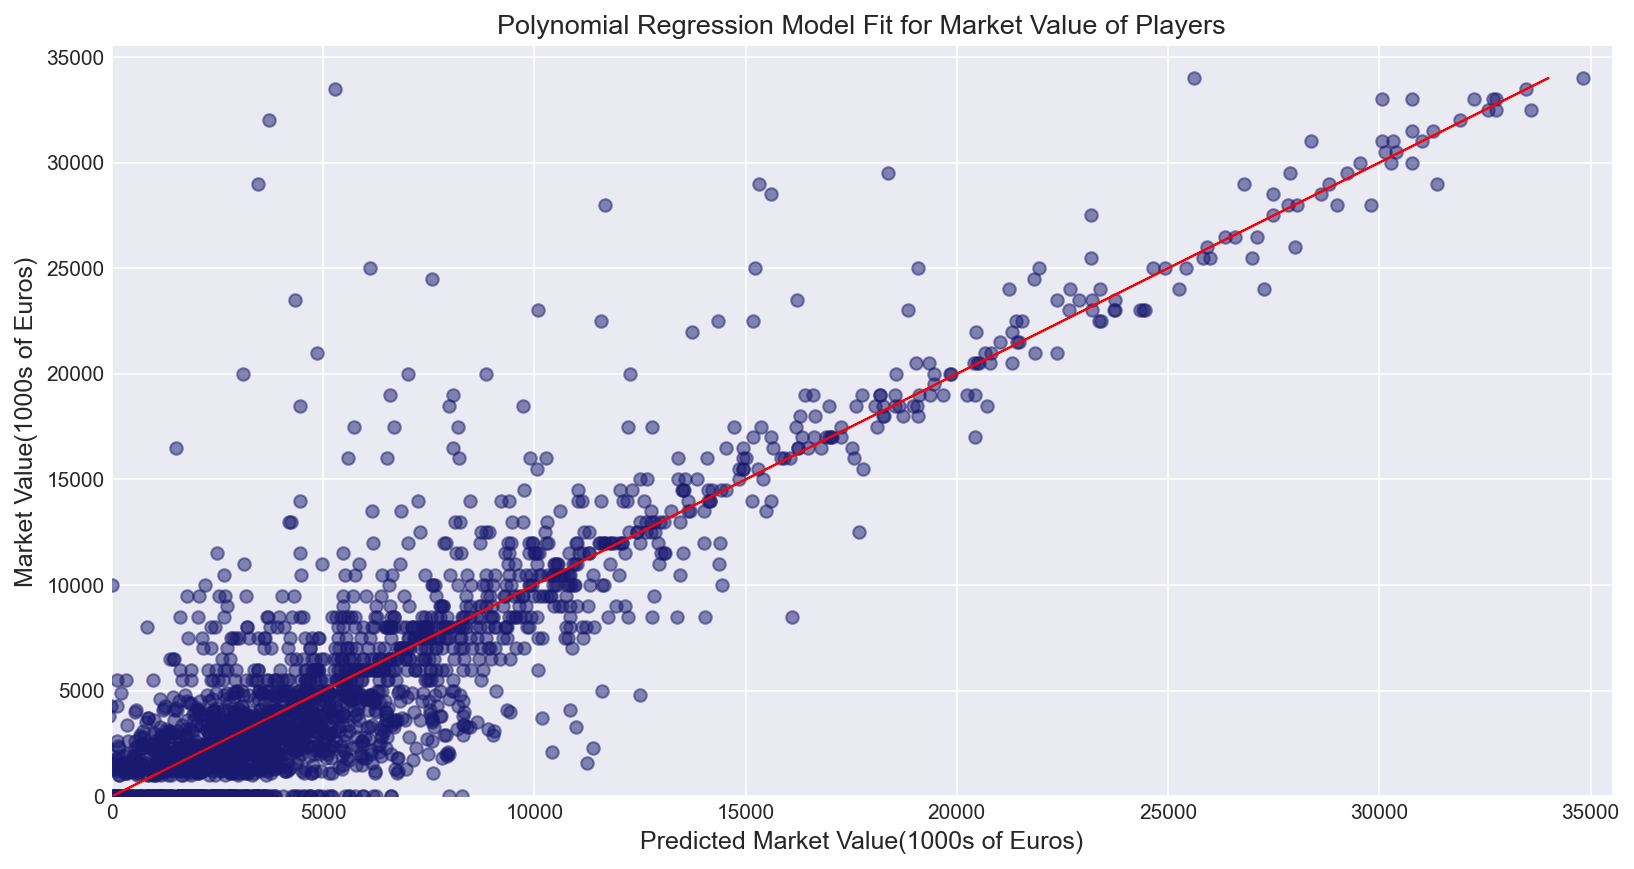

In [86]:
plt.style.use('seaborn-darkgrid')

fig = plt.figure(figsize=(10,5), dpi=150)
axes = fig.add_axes([0,0,1,1])
axes.set_title('Polynomial Regression Model Fit for Market Value of Players',fontsize=13)
axes.set_ylim(0,35500)
axes.set_xlim(0,35500)
axes.set_xlabel("Predicted Market Value(1000s of Euros)",fontsize=12)
axes.set_ylabel("Market Value(1000s of Euros)",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.plot(y, y, color='red',linewidth=1,)
plt.scatter(lin_reg2.predict(X_poly),y,color='#191970', alpha=0.5,
            label="Fitted Points")

plt.savefig('regression_fit.jpg')

In [87]:
# Model Key Fit Metrics

print("R Squared: Measure of Fit: ",metrics.r2_score(lin_reg2.predict(X_poly),y))
print("Mean Absolute Percentage Error (%):",(metrics.mean_absolute_error(lin_reg2.predict(X_poly),y)*100)/np.max(y))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(lin_reg2.predict(X_poly),y)))

R Squared: Measure of Fit:  0.7532550236116442
Mean Absolute Percentage Error (%): Value    5.37575
dtype: float64
RMSE:  2847.6167357544145


**Assessing Model Fit**


|Model Name|R Squared|MAPE|
|-|-|-|
|Polynomial Regression|0.753255|5.3|

We see that the Rsquared value for validation is acceptable and a big jump to 0.75 from 0.37 (Random Forest Regression). The MAPE value is also low which indicates that the model is performing predictions better.

## E.5. Conclusions and Inferences 

**Observations**
1. More points are observed for market values below 15 million euros indicating that we have a right skewed data.
2. The points are comparatively more scattered around the regression line when the market value is less that 15 million euros.
3. More points are observed above the regression line than below the regression line.

**Inferences**
* For valuations of 15 million or lower, often times the market value of the player is more than the value that can be translated/explained from his performance. 

* Hence, we can predict a market player's value based on his performance statistics more accurately only if the predicted value of the player (model output) is more than 15 million. 


## F. Putting it all together 

**Key Takeaways:**

* There is a stark difference in the money spent by the two groups of teams. However, this is not the sole factor determining the on-field performance. Even when the Next Five teams spend more on certain players, this does not reflect in their on-field performance due to deficiencies in scouting and recruiting departments.

* To improve performances, the Next Five teams should discard their strategy of just spending more on attacking players and pay equal attention to other positions as well. More often than not, good teams are based on a strong defense. Games can be won even by scoring just 1 goal if the defense is tight and does not concede.

* The top teams manage their budgets well between player improvement departments. This results in a more cohesive style of play that can be observed from the difference in their attacking (shooting) stats vs those of the Next Five Teams.

* Player transfer values are highly influenced by their specific on-field performances. The Next Five teams would be well advised to invest in a data analytics team that can help them in identifying appropriate players and their market values. Our model to predict transfer values observed that players with low market values are surprisingly overpaid for. Data departments in soccer clubs can help deal with this situation.

* In summary, while the Next Five Teams may not be able to compete with the top teams based on financial prowess immediately, there are some clear strategies that they can adopt to bridge the gap and compete for the highest honors.